# <center>2000s Cinematic Expedition: Box Office Mojo Domestic (2000-2023)<center>
    

 ## <center> Final Project <center>

# Table of Contents

1. [Introduction](#introduction)

    1.1. [Preface](#preface)
    
    1.2. [Literature Review](#literature-review)
    
    1.3. [Aims and Methodology](#aims-and-methodology)
    
    1.4. [Ethics](#ethics)
    
    1.5. [Importing Essentials](#importing-essentials)


2. [Preprocessing](#preprocessing)

    2.1. [Importing Data](#importing-data)


3. [Genre Distribution](#genre-distribution)

    3.1. [Genre Pie Chart](#genre-pie-chart)
    
    3.2. [Genre Stacked Bar Chart](#genre-stacked)
    
    3.3. [Distributors Pie Chart](#distributors-pie)


4. [Classification Models](#classification-models)

    4.1. [Sequential - Combination Labelled](#combination-label)
    
    4.2. [Sequential - Binary Labelled](#binary-label)
    
    4.3. [Sequential - Single labelled](#single-label)
    
    4.3.1.  [Visualizing Single Labelled Data](#single-label-vis)
    
    4.3.2. [Single Labelled Model](#single-label-model)


5. [Augmentation](#augment)

    5.1. [Augmentation by Synonym](#augment-syn)
    
    5.1.1. [Sequential Model with Synonym Augmented Data](#augment-syn-model)
    
    5.2. [Augmentation by Case Conversion](#augment-case-convers)
    
    5.2.1. [Sequential Model with Case-Conversed Augmented Data](#augment-case-convers-model)
    
    
6. [Simple RNN](#rnn)

    6.1. [Simple RNN Model](#rnn-model)
    
    6.2. [Simple RNN Model with Shuffled Data](#rnn-model-shuffled)
    
    
7. [LSTM](#lstm)

    7.1. [LSTM Model](#lstm-model)
    
    
8. [Functional API](#func-api)

    8.1. [Functional API Model - Title & Distributor Input](#func-api-model-title-dist)
    
    8.2. [Functional API Model - All Input](#func-api-model-all)
    
    8.3. [Functional API Model with a Sentiment Score](#func-api-sentimen)
    
    8.3.1. [Adding Sentiment Score](#sentiment-add)
    
    8.3.2. [Functional API Sentiment Model](#sentiment-model)
    
    
9. [Testing the Best Model](#best-model)
    
    9.1. [Testing the Best Model on our Data](#best-model-ourdata)
    
    9.2. [Testing the Best Model on another Data](#best-model-otherdata)
    
 
10. [Conclusion](#conclusion)


11. [References](#references)

# 1. Introduction
<a id="introduction"></a>
## 1.1. Preface
<a id="preface"></a>

In the project proposal, we scraped data from the box office mojo website which is one of the greatest online references that declare box office receipts, domestically and internationally based on their total sales each year. Our extracted data set is specifically about the 200 best domestic total sales from 2000 to 2023. This data consists of the movie's title, distributor, year in which the movie was shown (not just released) and total sale of each movie.

Additionally, another data set from Kaggle that was based on the IMDB website was used to add a genre column to our data set if the movie's title is similar to our data frame and the Kaggle one. An inflation factor has been defined to normalize the total sale of each movie and make them comparable with each other without considering the year of presentation and the value of the US dollar in that year. In the end, our data was visualized in some aspects like comparing the top 10 movies in each year and the respective total sales by bar charts and box plots. The final modified data frame was saved as a CSV file for further use in this project.
    
Our saved data frame has some missing values in the genre section, as our initial data and the one that we used from Kaggle to extract the genre are not the same. Those missing values were replaced with "Unknown" to be identified more easily in this phase of our research. Our intention is to predict and replace the "Unknown" genres using machine learning and deep learning classification methods. Some further visualisation will be presented to have a better insight into our data distribution regarding the genres and movie distributors.

I am going to use machine learning and deep learning models for my prediction. I think it is good to start with the difference between machine learning and deep learning first from a definition in Amazon."The goal of any AI system is to have a machine complete a complex human task efficiently. Such tasks may involve learning, problem-solving, and pattern recognition.
On the other hand, the goal of ML is to have a machine analyze large volumes of data. The machine will use statistical models to identify patterns in the data and produce a result. The result has an associated probability of correctness or degree of confidence."<sup>[<a href="https://aws.amazon.com/compare/the-difference-between-artificial-intelligence-and-machine-learning/#:~:text=The%20goal%20of%20any%20AI,analyze%20large%20volumes%20of%20data.">Link</a>]</sup>

We as humans have some sense of what a movie genre is when reading the title. Many of these predictions are based on our previously watched movies. Even if we do not have any idea what genre a Batman movie is the first time, the second time we will predict that it would not be a comedy. I believe models can learn from a large data set that eventually a movie title consisting of Evil indicates the Horror genre most of the time, although there are outliers like Maleficent: Mistress of Evil.

## 1.2. Literature review
<a id="literature-review"></a>

A movie consists of many features such as video, script, audio and posters. There are three main collections of data that have been used for classifying movies. These three types of data are:
- text: using a text type input such as a movie's description of our data or the movie's subtitle and script ( full or partial).
- picture: using the poster of the movies, or some frames of the movie
- videos: using a semi-short version of the movie or the full version of our video with or without the audio

For text-based classification, a great approach is being used In a detailed study -[Rajput, Nikhil Kumar, and Bhavya Ahuja Grove, 2022](https://link-springer-com.gold.idm.oclc.org/article/10.1007/s11042-022-12961-6)-  to classify the movie regarding the subtitles. The subtitles have first been processed by undergoing some changes like removing stop words and then trying to apply feature extraction by words that seem more essential for identifying the genre using machine learning techniques. The algorithm used in the project retrieves the most relevant words that relate to a movie’s genre. The algorithm was run on 964 movies from six genres: Action, Fantasy, Horror, Romance, Sports and War.


Another great work - [Kumar, Sanjay, Nikhil Kumar, Aditya Dev, and Siraz Naorem, 2023](https://link-springer-com.gold.idm.oclc.org/article/10.1007/s11042-022-13211-5)- has been done to classify movies from information extracted by their synopses and plots. A label powerset has been used to convert the multi-label classification into a single-labelled one by generating the set of all possible combinations of the labels present in the dataset. Their approach was a classical machine learning classifier namely: multinomial naive Bayes (MNB), logistic regression (LR), K-nearest neighbour (KNN), and support vector classifier (SVC).

In research  - [Hwang, Tae-Gyu, Chan-Soo Park, Jeong-Hwa Hong, and Sung Kwon Kim, 2016](https://link-springer-com.gold.idm.oclc.org/article/10.1007/s11042-016-3526-8) - about making a movie recommendation system on the dataset of MovieLens with 100k samples and 18 genres has been used. The movies are classified into the pair of genres that have the highest correlation value. The total number of unique genes becomes 7 and each movie becomes a combination of these 7 with the most relation.  


Within a movie classification investigation - [Mangolin, Rafael B., Rodolfo M. Pereira, Alceu S. Britto, Carlos N. Silla, Valéria D. Feltrim, Diego Bertolini, and others, 2022](https://link-springer-com.gold.idm.oclc.org/article/10.1007/s11042-020-10086-2) - audio and images from trailers, subtitles, posters, and synopses have been used in a multi-label scenario using multimodal classifiers. The approach used multi-label classifiers for each representation using the Binary Relevance and ML-kNN algorithms.


Another similar study - [Cai, Zihui, Hongwei Ding, Jinlu Wu, Ying Xi, Xuemeng Wu, and Xiaohui Cui, 2023](https://link-springer-com.gold.idm.oclc.org/article/10.1007/s11042-023-16121-2) - used audio, poster, plot and frame sequences from video of movies and applying multimodal fusion techniques including decision-level fusion and intermediate fusion on a multi-label movie genre classification data. As the movies are multi-genre they trained binary classifiers about the number of geners. They designed three multimodal models, including the decision-level fusion model (LAVO-D) and two intermediate fusion models (LAVO-C and LAVO-S).

In a recent study - [Behrouzi, Tina, Ramin Toosi, and Mohammad Ali Akhaee, 2023](https://link-springer-com.gold.idm.oclc.org/article/10.1007/s11042-022-13418-6) - the movies were classified using the movies' acoustic and visual features as a set of frames that are time-sequential dependent and by designing a deep 1D convolutional network and two RNN structures (LSTM and GRU) 


Another research - [Narawade, Vaibhav, Aneesh Potnis, Vishwaroop Ray, and Pratik Rathor, 2023](https://www.itm-conferences.org/articles/itmconf/abs/2021/05/itmconf_icacc2021_03048/itmconf_icacc2021_03048.html) - tried to classify movies into the three most probable genres that they belong to out of 25 genres by one poster of that movie. using a Convolutional Neural Networks (CNN) model and extracting visual info. The approach was not a binary classification but a multi-label classification (25 predefined genres). They also applied techniques such as data augmentation and L2 regularization in their approach.


A Video-based movie genre classification approach - [Zhang, Zhongping, Yiwen Gu, Bryan A Plummer, Xin Miao, Jiayi Liu, and Huayan Wang, 2023](https://arxiv.org/abs/2203.13281) - used the entire video as the input, ignoring the language element of the video and passing it to a video encoder while passing the audio element separately by using an Automatic Speech Recognition (ASR) system. They used a shot sampling strategy to select key frames from input video as the visual representations.


In a significant inquiry - [Mangolin, Rafael B, Rodolfo M Pereira, Alceu S Britto, Carlos N Silla, Valéria D Feltrim, Diego Bertolini, and others, 2020](https://arxiv.org/abs/2006.00654) - used a dataset composed of trailer video clips, subtitles, synopses, and movie posters taken from 152,622 movie titles from The Movie Database (TMDb), Each movie of the dataset was labelled according to a set of eighteen genre labels. They extracted features from these data using different kinds of descriptors, namely Mel Frequency Cepstral Coefficients (MFCCs), Statistical Spectrum Descriptor (SSD), Local Binary Pattern (LBP) with spectrograms, Long-Short Term Memory (LSTM), and Convolutional Neural Networks (CNN). The descriptors were evaluated using different classifiers, such as BinaryRelevance and ML-kNN.Literature review

## 1.3. Aims and Methodology
<a id="aims-and-methodology"></a>

The objective of the project is to find a proper deep-learning model for our data that can classify the genres of movies from the title and predict the unknown genres in our dataset. Our data is much more limited in comparison to previous studies that used full scripts, videos, audio and posters of a movie and in some cases a combination of those. A title is not typically more than 5 words, and our model must try to learn from the words that sometimes are just a name without a specific meaning, I did not find an exact project that tries to classify movies by their titles only.

As mentioned in previous studies predicting the genes of a movie is a multiclassification task, Our first attempt would be using a sequential model with a single input of just the title. As the multiclass classification is harder and more likely to lead our model to overfit especially in data that is limited only to movie titles, we will reduce the genres into one genre, so that each movie title is related to one main genre only. The next approach would be adding a sentiment analysis score which is used in movie review classification research, and makes a 2-input model based on how negative or positive a movie title might be and the relevance of the movie's sentiment score to the genre. The number of inputs will increase to improve the accuracy, these inputs are the ones used in our data frame such as total gross, year of presentation and movie distributor.

We will try to increase the number of inputs sequentially to increase the accuracy. Other models like LSTM or convolutional models have also been considered based on the previous research and some of them will be used to see if they can achieve better scores. The choice of the models' priority is first trying to use simple models as much as we can, as the more complex a model becomes the more probable that it leads to overfits. It is worth mentioning that our data is not distributed equally in hence of the genre so the number of specific genres is more than the others which will affect model prediction. Some techniques like data augmentation, dropouts and regularization are also used to avoid overfitting occurrences. In our case using convolutional models which is one of the popular approaches for classifying genres from movie posters does not seem to be a proper choice as titles are mostly something between 2 and 3 words.

Predicting the missing genre in our data set is enjoyable but as the values are missing due to the difference between our scraped data and the data set that we used to extract the genre, there would not be a measurement of our model succession in unseen data. Therefore, another external data set that has no common titles would be used for the final evaluation. 

## 1.4. Ethics
<a id="ethics"></a>

In my project proposal, I mentioned that the Box Office Mojo website which I scrape parts of my data "does not expressly describe any prohibitions concerning web scraping. It is necessary for individuals engaging in personal utilization or copying of the source data obtained from this platform to check the extant terms and conditions of the website, whilst also ensuring permissions."

The [Kaggle data set](https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset) that I used to add the genre of each movie to the scrapped data set clearly noted: "This data can be used for various analyses, such as identifying trends in movie genres, exploring the relationship between budget and revenue, and predicting the success of future movies."

The [second Kaggle data set](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows) that we use for the final evaluation does not mention any limitation use and licensed as public domain.

This project is trying to explore different models for the purpose of movie title classification and not using it as it is for predicting a movie's genre for any use such as movie suggestion systems, as the accuracy is not high and even if the accuracy was high, there would always be some mistakes which may lead to misclassification. I do not recommend using any models of classification for animations or mixing movies with different age restriction policies.

I do not have any plans for publishing this research right now. This notebook is written only for my data programming module at the Gold Smiths University of London and is accessible for examination and research purposes.

## 1.5. Importing Essentials
<a id="importing-essentials"></a>

All the essential liberties and other features that we need in this notebook can be imported by the next cell. These modules are related to visualizing our data, increasing the number of data that we have and making our model in TensorFlow.

In [1]:
#Importing essentials

#Regarding the data frame
import pandas as pd

# Regarding the visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display

#Regarding data augmentations and defining our data to the model
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import wordnet
from itertools import product
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Regarding making the model
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.metrics import f1_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.regularizers import l2

#Regarding unit testing
import unittest

#For clearing any previously stored model and getting the same results every time
K.clear_session()
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)


# 2. Preprocessing
<a id="preprocessing"></a>

## 2.1. Importing Data
<a id="importing-data"></a>

We import the previous data frame that we worked in, which consists of the movies' title, Theater Sale, total gross, distributor, year in which the movie played (not specifically the one that the movie was produced) and genre.

The library to handle and modify our data frame is Pandas. It seems like Pandas has some problems handling large data sets as mentioned by Chengzhi Zhao "Pandas uses only one CPU core at a time to perform the data manipulation tasks and takes no advantage on modern PC with multiple cores on parallelism."<sup>[<a href="https://chengzhizhao.com/4-faster-pandas-alternatives-for-data-analysis/#:~:text=Why%20is%20Pandas%20slow%20on,with%20multiple%20cores%20on%20parallelism">Link</a>]</sup>

Alternatives for Pandas are Dask, Vaex and cuDF which support parallelism. As our data frame is not big, I keep using Pandas for our purpose.

In [2]:
try:
    imported_df = pd.read_csv('df_concat.csv')
except FileNotFoundError:
    print("The file is not found, check the file's path and the file's name.")
except pd.errors.EmptyDataError:
    print("The CSV file is empty.")
except pd.errors.ParserError:
    print("The file format is incorrect.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Here is what our data frame looks like

In [4]:
display(imported_df.head(5))

,Unnamed: 0,Movies,theater sale,total gross,distributor,Year,Genre
0,0,How the Grinch Stole Christmas,5828.24,465480236.8,Universal Pictures,2000,"Family, Comedy, Fantasy"
1,1,Mission: Impossible II,6567.51,385583701.3,Paramount Pictures,2000,"Adventure, Action, Thriller"
2,2,Gladiator,5706.52,335992714.3,DreamWorks Distribution,2000,"Action, Drama, Adventure"
3,3,The Perfect Storm,6098.53,326886996.9,Warner Bros.,2000,"Action, Adventure, Drama, Thriller"
4,4,Meet the Parents,4827.63,297576840.6,Universal Pictures,2000,"Comedy, Romance"


There are some movies that appeared twice in our data frame as they might be showing in different years and placed in the top 200. For comparing the most frequent genres, having these duplicated values avoids a fair comparison. However, in the case of total sales and finding the most profitable distributors, they have to be separated. Therefore, a copy of the imported data frame has to be made to keep both of these versions for our analysis. There are 715 duplicated movies based on the next cell.

In [5]:
try:
    # see the number of duplicated titles
    duplicated_count = imported_df.duplicated(subset='Movies').sum()

    print("Total number of duplicated movies:", duplicated_count)

    # make a copy for further changes
    Noduplicate_df = imported_df.copy()

except pd.errors.EmptyDataError:
    print("The data frame is empty. Unable to calculate duplicated count.")
    
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Total number of duplicated movies: 715


In [6]:
try:
    # Drop duplicates from the data frame
    Noduplicate_df = Noduplicate_df.drop_duplicates(subset='Movies', keep='first')

    print("Number of titles in the imported data frame:", imported_df.shape[0])
    print("Number of titles after removing duplicates:", Noduplicate_df.shape[0])

except Exception as e:
    print(f"An error occurred during the duplicate removal: {e}")


Number of titles in the imported data frame: 5000
Number of titles after removing duplicates: 4285


# 3. Genre Distribution
<a id="gener-distribution"></a>
In the following section, we will try to demonstrate our data frame using a pie chart and stack bar chart. For the demonstration, I used Matplotlib one of the most widely used libraries for plotting in Python and Seaborn which allows us to use more lively colour palettes. Other possible alternatives were Vega-Altair and Bokeh.

Vega-Altair allows us a more interactive way to see the percentage of a pie chart by putting the cursor on it, I believe it is more useful for a more interaction-based project than mine. Bokeh's focus was also more based on focusing on interactivity, which may be a better option for websites.
As the classes in most of my figures are more than 9, I can not use distinctive colourblind colours. therefore, The charts are demonstrated two times, with a colourblind pallet and with an ordinary one which is my preferred combination. I tried to avoid any similar colours beside each other in ordinary pallets.

Demonstrating the distribution of genre is crucial as our data is not equally spread and the chances of genre with the highest diffusion is more probable. By finding the distribution we can also find out what accuracy leads to predicting the highest probable genre.

## 3.1. Genre Pie Chart
<a id="gener-pie-chart"></a>
Using a Pie allows us to show the distribution of a variable and is an effective way to emphasize the comparison of different categories. The share of 'Western', 'Documentary' and 'TV Movie' is low, so we combine these 3 genres into 'Others' when demonstrating.


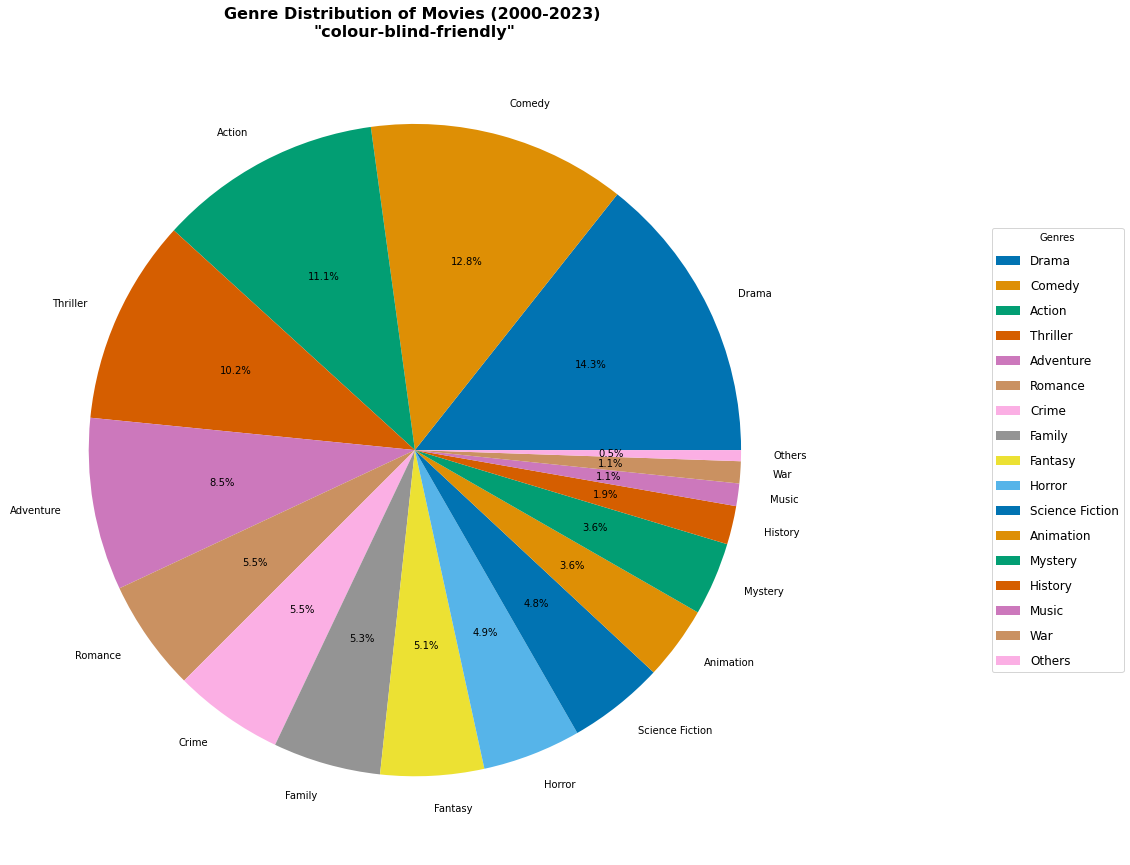

In [7]:

try:
    #split the genres by comma
    genres_df = Noduplicate_df['Genre'].str.split(',', expand=True)
    #using .stack() to pivot our data frame, .strip() to remove white space
    genres_stacked = genres_df.stack().str.strip().reset_index(level=1, drop=True).to_frame('Genre')
    #count the occurrences of each unique value 
    genre_counts = genres_stacked['Genre'].value_counts()

    # Combine 'Western', 'Documentary' and 'TV Movie' genres into 'Others'
    genres_to_combine = ['Western', 'Documentary', 'TV Movie'] #defining genres we don't want
    genre_counts['Others'] = genre_counts.loc[genres_to_combine].sum()
    genre_counts = genre_counts.drop(genres_to_combine) #remove those genres
    #removing Unknown from the data frame
    filtered_genre_counts = genre_counts[genre_counts.index != 'Unknown']

    # Check if there is any data to plot
    if not filtered_genre_counts.empty:
        # Create a pie chart using the Seaborn colourblind palette
        plt.figure(figsize=(15, 15))
        plt.pie(filtered_genre_counts, labels=filtered_genre_counts.index, autopct='%1.1f%%',
                colors=sns.color_palette('colorblind'))
        plt.title('Genre Distribution of Movies (2000-2023) \n"colour-blind-friendly"', fontsize=16, fontweight='bold')
        # Prevent distortion of the pie shape
        plt.gca().set_aspect('equal')
        # The legend
        plt.gca().legend(filtered_genre_counts.index, loc='center left', bbox_to_anchor=(1.2, 0.5), title='Genres',
                         labelspacing=1, fontsize='large')
        plt.show()
    else:
        print("No data available for plotting.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


I have picked colours manually for the next pie chart, the categories are more than colour-blind-friendly pallets therefore I created my own pallet from Wikipedia.<sup>[<a href="https://en.wikipedia.org/wiki/List_of_colors:_A%E2%80%93F">Link</a>]</sup>
 Typically a pie chart with so many sections or the same colours can confuse. In this case, I can not remove more sections but I tried to choose different colours as much as I could.

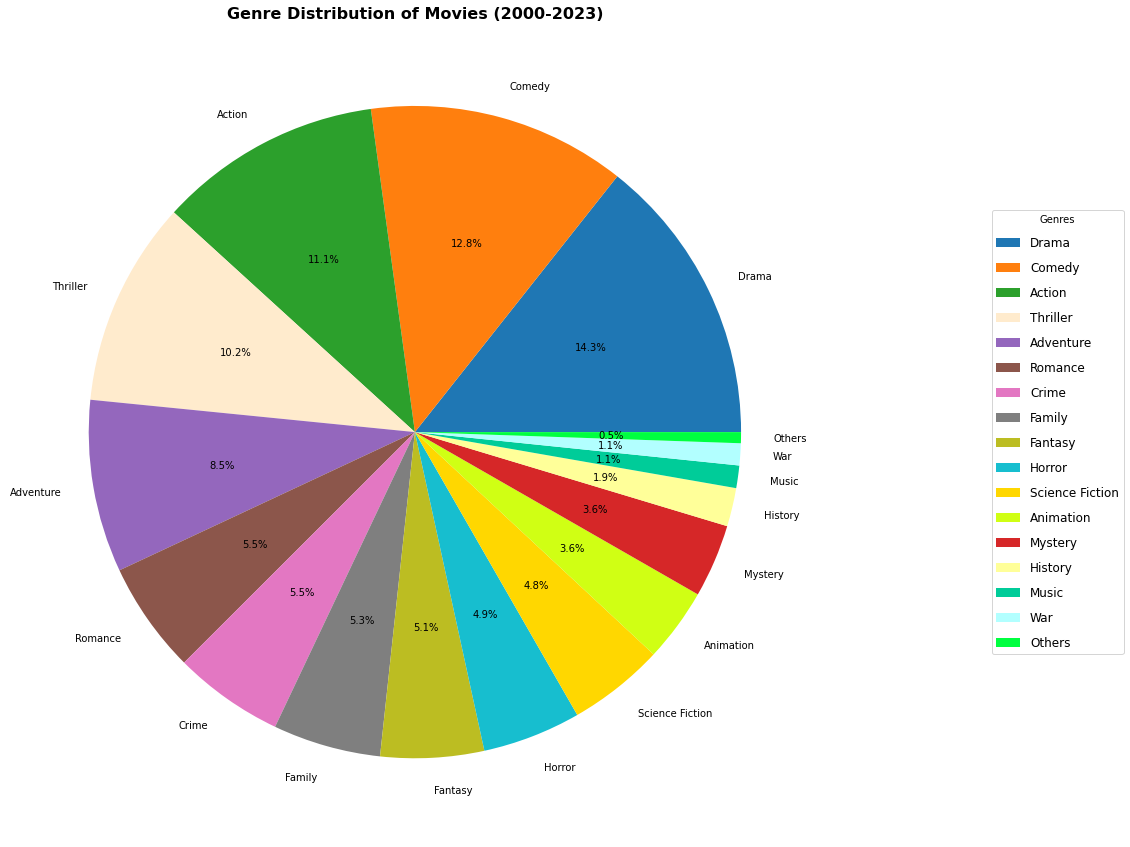

In [8]:
# Manually specify distinct colours for each genre
custom_colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#FFEBCD', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F',
                 '#BCBD22', '#17BECF', '#FFD700','#D0FF14', '#D62728', '#FFFF99', '#00CC99', '#B2FFFF', '#00FF40']

plt.figure(figsize=(15, 15))
plt.pie(filtered_genre_counts, labels=filtered_genre_counts.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Genre Distribution of Movies (2000-2023)', y=1, fontsize=16, fontweight='bold')

#prevent distortion of the pie shape
plt.gca().set_aspect('equal')

#the legend
plt.gca().legend(filtered_genre_counts.index, loc='center left', bbox_to_anchor=(1.2, 0.5), title='Genres', labelspacing=1, fontsize='large')

plt.show()


'Drama', 'Comedy' and 'Action' with 14.3%, 12.8% and 11.1% have the most distribution in our data set.

## 3.2. Genre Stacked Bar Chart
<a id="gener-stacked"></a>
Another visualisation method for comparison is using a stacked bar chart, in which we can show the top 3 genres in each year and the number of occurrences of each genre in that year. Compared to ordinary bar charts which the outcome becomes wide and hard to recognise due to the long period, the stacked bar chart is a better option.

To do that, we make a data frame of each year and the number of occurrences of each genre respectively on that year. We can see what the new data frame (`genre_counts_by_year`) looks like. For stacked bar chat colouring I used light Paul Tol’s Color Scheme which is colorblind friendly.

In [9]:
try:
    # Add the 'Year' column to the genres_df
    genres_df['Year'] = Noduplicate_df['Year']

    # Reshape the data frame to have one genre per row
    genres_stacked = genres_df.set_index('Year').stack().str.strip().reset_index(level=1, drop=True).to_frame('Genre')

    # Count the occurrences of each genre by year
    genre_counts_by_year = genres_stacked.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

    # delete the 'Unknown' column 
    genre_counts_by_year = genre_counts_by_year.drop('Unknown', axis=1)

    display(genre_counts_by_year.head())

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Year,,,,,,,,,,,,,,,,,,,
2000,26,21,10,42,14,0,50,17,18,3,12,6,12,16,14,2,29,2,1
2001,27,18,8,40,21,0,36,11,10,2,8,3,11,27,11,0,31,4,0
2002,29,21,10,35,16,2,39,14,14,7,11,4,11,16,12,0,30,5,1
2003,37,26,8,45,23,0,38,21,17,4,12,2,11,17,9,0,30,5,2
2004,34,27,6,42,13,1,40,15,12,4,12,2,12,25,8,0,23,3,1


In [10]:
# Create an empty list to store the results
top3_genres_data = []

try:
    for year in genre_counts_by_year.index.unique():
        # Get the row for the respective year
        year_row = genre_counts_by_year.loc[[year]]

        # Get the top 3 genres and their counts for the respective year
        sorted_genres = year_row.iloc[:, :].sum().sort_values(ascending=False)
        top_genres = sorted_genres.index[:3].tolist()
        top_counts = sorted_genres.values[:3].tolist()

        # Append the results to the list
        top3_genres_data.append({
            'Year': year,
            'Top 1 Genre': top_genres[0],
            'Count 1': top_counts[0],
            'Top 2 Genre': top_genres[1],
            'Count 2': top_counts[1],
            'Top 3 Genre': top_genres[2],
            'Count 3': top_counts[2],
        })

    # Create a data frame from the list
    top3_genres_df = pd.DataFrame(top3_genres_data)

    # Display the first 3 rows of the data frame
    display(top3_genres_df.head(3))

except KeyError as ke:
    print(f"KeyError: {ke}. Check if the 'genre_counts_by_year' DataFrame has the expected structure.")
except IndexError as ie:
    print(f"IndexError: {ie}. There might be an issue with the index used in 'genre_counts_by_year'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


,Year,Top 1 Genre,Count 1,Top 2 Genre,Count 2,Top 3 Genre,Count 3
0,2000,Drama,50,Comedy,42,Thriller,29
1,2001,Comedy,40,Drama,36,Thriller,31
2,2002,Drama,39,Comedy,35,Thriller,30


I demonstrate the first 3 rows of our data frame above to show how it looks before visualizing it.

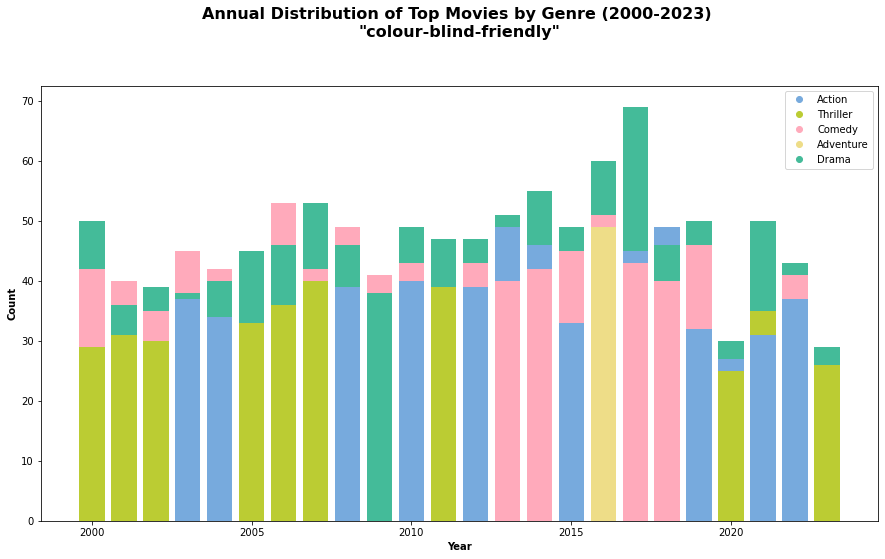

In [11]:

try:
    # Sort the data frame by 'Year'
    top3_genres_df = top3_genres_df.sort_values(by='Year')

    # Define a dictionary to relate genres to colours
    genre_colors = {
        'Action': '#77AADD',
        'Adventure': '#EEDD88',
        'Animation': '#EE8866',
        'Comedy': '#FFAABB',
        'Crime': '#DDDDDD',
        'Documentary': '#DDDDDD',
        'Drama': '#44BB99',
        'Family': '#BBCC33',
        'Fantasy': '##77AADD',
        'History': '#AAAA00',
        'Horror': '#EE8866',
        'Music': '#EEDD88',
        'Mystery': '#FFAABB',
        'Romance': '#99DDFF',
        'Science Fiction': '#44BB99',
        'TV Movie': '#AAAA00',
        'Thriller': '#BBCC33',
        'War': '#99DDFF',
        'Western': '#77AADD'
    }

    if 'Year' not in top3_genres_df.columns:
        raise ValueError("Column 'Year' is not found in the data frame.")

    if top3_genres_df.empty:
        raise ValueError("The data frame is empty.")

    fig, ax = plt.subplots(figsize=(15, 8))

    # set an empty set to store unique genre labels
    unique_labels = set()

    # Plotting
    for i in range(3):
        genre_col = f'Top {i+1} Genre'
        count_col = f'Count {i+1}'
        color = top3_genres_df[genre_col].map(genre_colors)
        ax.bar(top3_genres_df['Year'], top3_genres_df[count_col], label=top3_genres_df[genre_col], color=color)
        unique_labels.update(top3_genres_df[genre_col].dropna().unique())  # Update unique labels set

    # Adding labels
    plt.xlabel('Year', fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.title('Annual Distribution of Top Movies by Genre (2000-2023) \n"colour-blind-friendly"', y=1.1, fontsize=16, fontweight='bold')

    # legend with unique genre labels
    legend_labels = [plt.Line2D([0], [0], color=genre_colors[label], marker='o', linestyle='', label=label) for label in unique_labels]
    plt.legend(handles=legend_labels)

    plt.show()

except ValueError as ve:
    print(f"ValueError occurred: {ve}")

except KeyError as ke:
    print(f"KeyError occurred: {ke}. Check the data frame structure.")

except IndexError as ie:
    print(f"IndexError occurred: {ie}. There might be an issue with the index used in 'genre_counts_by_year'.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


## 3.3. Distributors Pie Chart
<a id="distributors-pie"></a>

In creating the distributors' pie chart, we will use the data frame before removing the duplicates because some movies were in the chart of top-grossing multiple years.

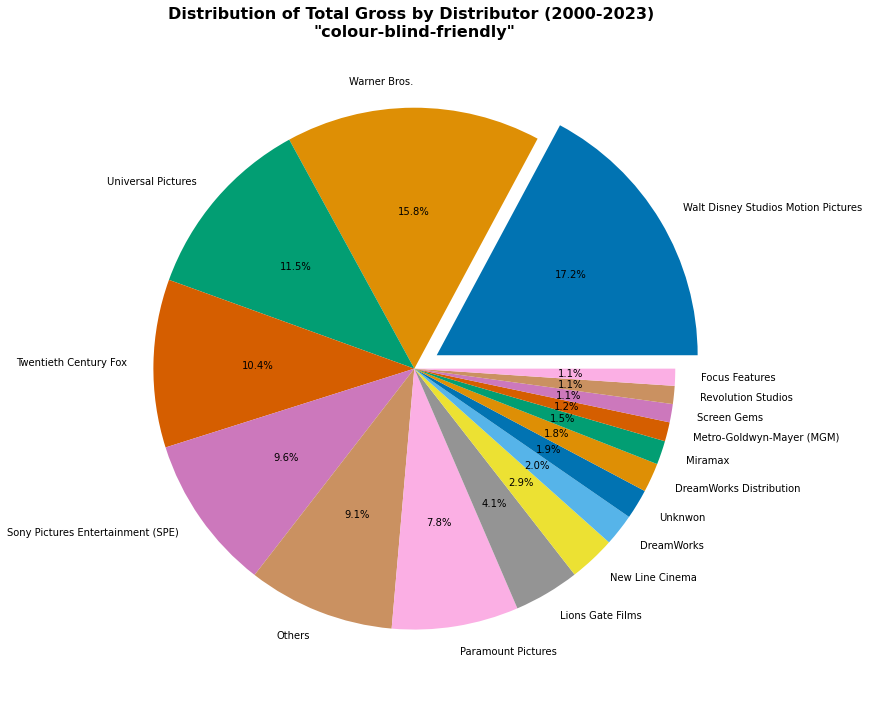

In [12]:

try:
    # Grouping the data by 'distributor' and calculating the sum of 'total gross' for each
    distributor_gross = imported_df.groupby('distributor')['total gross'].sum()

    # Finding distributors with less than 1% share and label them as 'Others'
    small_distributors = distributor_gross[distributor_gross < 0.01 * distributor_gross.sum()]
    imported_df.loc[imported_df['distributor'].isin(small_distributors.index), 'distributor'] = 'Others'

    # Recalculating total gross
    distributor_gross = imported_df.groupby('distributor')['total gross'].sum()

    # Sorting
    distributor_gross = distributor_gross.sort_values(ascending=False)

    # Explode for each section
    explode = [0.1] + [0] * (len(distributor_gross) - 1)

    # Plotting
    plt.figure(figsize=(12, 12))
    plt.pie(distributor_gross, labels=distributor_gross.index, autopct='%1.1f%%', colors=sns.color_palette('colorblind'), explode=explode)
    plt.title('Distribution of Total Gross by Distributor (2000-2023) \n"colour-blind-friendly"', y=1, fontsize=16, fontweight='bold')
    plt.show()

except KeyError as ke:
    print(f"KeyError occurred: {ke}. Check the data frame structure.")
    
except ZeroDivisionError as ze:
    print("Error: Division by zero. Check if any value in the 'total gross' column is zero.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

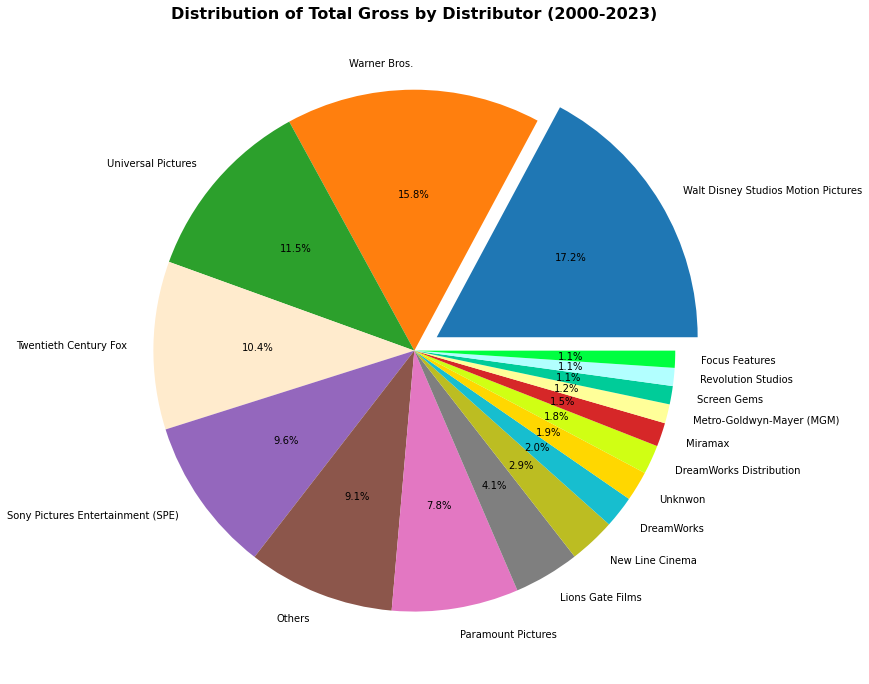

In [13]:
# Plotting 
plt.figure(figsize=(12, 12))
plt.pie(distributor_gross, labels=distributor_gross.index, autopct='%1.1f%%', colors=custom_colors, explode=explode)
plt.title('Distribution of Total Gross by Distributor (2000-2023)', y=1, fontsize=16, fontweight='bold')
plt.show()


We can see that "Walt Disney", "Warner Bros." and "Universal Pictures" with 17.2%, 15.8% and 11.5% have the biggest shares.
Distributors whose shares were under 1% were labelled as Others.

In the end, before starting the classification section, we will split our data into known and unknown genres. We will do our training in the known general data.

In [30]:
# Split the data frame into two based on the 'Genre' column
known_genre_df = imported_df[imported_df['Genre'] != 'Unknown']
unknown_genre_df = imported_df[imported_df['Genre'] == 'Unknown']

In [31]:
# saving the data frame
known_genre_df.to_csv('known_genre_df.csv', index=False, encoding='utf-8')
unknown_genre_df.to_csv('unknown_genre_df.csv', index=False, encoding='utf-8')

In [14]:
# reading the data frame
known_genre_df = pd.read_csv('known_genre_df.csv')
unknown_genre_df = pd.read_csv('unknown_genre_df.csv')

# 4. Classification Models
<a id="classification-models"></a>

In all of our approaches, we will split our data into a training set ( 80% of the data) and a validation set (20%). The training set will be the one our model tries to learn from and the validation to test in it. Making this splitting is crucial to avoid any data leakage and see how our model reacts to unseen data before testing it on the actual testing set.
A good explanation for validation data has been provided by Jason Brownlee "The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration."<sup>[<a href="https://machinelearningmastery.com/difference-test-validation-datasets/">Link</a>]</sup>

## 4.1. Sequential - Combination Labelled
<a id="combination-label"></a>

Our first approach is making a sequential model with dense layers. In order to do that we define the input (the title of movies) and the outputs (the genres). In this approach, each combination of genres is defined as a single label and then encoded as a number that is stored as an array.

For the input, we will tokenize each movie title and then pad that tokenized movie title so that the list of each tokenized movie title has the same length. During the training phase, when the tokenizer encounters a word that is not in its vocabulary, it replaces that word with the specified `oov_token` which the default is None. This ensures that every word in the corpus is assigned a unique integer index. we have defined the maximum number of words to 10 so that if a movie's title is more than 10 words, only the first 10 would be accepted. The data is split into validation and training sets.

Unit testing is also defined in the following cells to check the existence of padding and proper shape for our inputs and then another one for checking the encoding of our outputs. In the first unit testing, we will check the padding. The first section of the first test relates to the existence of value (to see if a value is produced by the function defined earlier for tokenising and padding) and the second section of the first test checks the shape of our padding to be in our defined desired format.

In [15]:
def preprocess_inputdata_x(df):
    # check if there is any missing value
    if df[['Movies', 'Genre']].isnull().any().any():
        print("Warning: Missing values found in the 'Movies' or 'Genre' columns.")

    # Extract features and labels
    x_train = df['Movies']
    
    # Tokenize the movie titles
    max_words = 10
    tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
    tokenizer.fit_on_texts(x_train)

    # Convert movie titles to sequences
    x_train_seq = tokenizer.texts_to_sequences(x_train)

    # Pad sequences to have the same length
    max_length = max(len(seq) for seq in x_train_seq)
    x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')
    
    return x_train_padded, max_words, max_length

class TestPadding(unittest.TestCase):
    def test_padding_exists(self):
        self.assertIsNotNone(preprocess_inputdata_x)

    def test_padding_shape(self):
        
        x_train_padded, _, _ = preprocess_inputdata_x(known_genre_df)

        # Check if padding is done correctly
        max_length = max(len(seq) for seq in x_train_padded)
        self.assertEqual(x_train_padded.shape[1], max_length, "Padding did not result in the expected shape.")

unittest.main(argv=['ignored', '-v'], exit=False)

test_padding_exists (__main__.TestPadding) ... ok
test_padding_shape (__main__.TestPadding) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.051s

OK


The second unit testing checks the function that encodes our labels to see if the labels created after the function matches.

In [16]:

def encode_labels(df):
    # Extract features and labels
    y_train = df['Genre']

    # Encode the labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)

    return y_train_encoded

class TestLabelEncoding(unittest.TestCase):
    def test_encoding(self):

        # Call the function that performs label encoding
        y_train_encoded = encode_labels(known_genre_df)

        # Check if the encoding is done correctly
        label_encoder = LabelEncoder()
        expected_encoded_labels = label_encoder.fit_transform(known_genre_df['Genre'])
        self.assertListEqual(list(y_train_encoded), list(expected_encoded_labels),
                             "Label encoding did not produce the expected result.")


unittest.main(argv=['ignored', '-v'], exit=False)

test_encoding (__main__.TestLabelEncoding) ... ok
test_padding_exists (__main__.TestPadding) ... ok
test_padding_shape (__main__.TestPadding) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.055s

OK


It will be concluded by the next cell that we have 946 combinations of genres in our data, which is a lot and it is not probable that our network could classify 960 combinations.

In [17]:

try:
    # data preprocessing
    x_train_padded, _, max_length = preprocess_inputdata_x(known_genre_df)

    # label encoding
    y_train_encoded = encode_labels(known_genre_df)

    # Splitting data into training and validation
    partial_x_train, x_val, partial_y_train, y_val = train_test_split(
        x_train_padded, y_train_encoded, test_size=0.2, random_state=20
    )

    # Defining num_classes for the output layer as we are using the softmax function
    num_classes = len(np.unique(y_train_encoded))

except ValueError as ve:
    print(f"ValueError: {ve}. There is a problem with data or preprocessing functions.")
except Exception as e:
    print(f"An unexpected error occurred: {e}.")

In [18]:
print ('number of genre combinations:', num_classes)

number of genre combinations: 946


Before defining our model `np.random.seed()`,`tf.random.set_seed()`, and `random.seed()` is set to 20 (It can be any other number) to avoid randomisation in the start and get same results every time we run the model.

In the first model, we will define a sequential. "A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor." based on the TensorFlow website.<sup>[<a href="https://www.tensorflow.org/guide/keras/sequential_model">Link</a>]</sup>
Our models are defined as a function, using `clear_session()` so that our model starts fresh each time we create a model and previous models do not affect the following ones.

In the beginning, we define an Embedding layer which is defined as "a layer that can be used for neural networks on text data. It requires that the input data be integer encoded so that each word is represented by a unique integer." by Jason Brownlee.<sup>[<a href="https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/#:~:text=2.-,Keras%20Embedding%20Layer,API%20also%20provided%20with%20Keras.">Link</a>]</sup>

The Choice of choosing the input dimension is related to the complexity of our data set, Common values for output_dim are often powers of 2, such as 32, 64, 128, 256, etc. The 128, is one of the common choices which provides a balance.
Next, we will flatten our array so that instead of a tensor with a high dimension, all squash together as a long tensor of 1d dimension (a matrix).

Then we will define 3 dense layers, a dense layer is a regular deeply connected neural network layer. The number of neurons in each layer except for the last one in this case is arbitrary. Adding so many neurons in one layer makes it computationally slow and expensive, that's why in deep learning for making a complex model we will spread the neurons in a number of layers instead of just one layer.

It is good to note that a complex model is not always better, even if the time and the cost are not a problem, complex models tend to overfit (memorizing sequences instead of learning the relations) more.
For the activation function. "The ReLU is the most used activation function in the world right now."<sup>[<a href="https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6">Link</a>]</sup>
In this case, the linearity of the relu activation function was the reason for my choice instead of sigmoid or tanh.

In the output layer the softmax activation is used, google defined it as: "Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would".<sup>[<a href="https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax#:~:text=Softmax%20extends%20this%20idea%20into,quickly%20than%20it%20otherwise%20would">Link</a>]</sup>
The number of neurons in the last year with the softmax activation function is the same number as our labels for the movies (or in other classification tasks, the number of classes).

We will then compile our model and define the loss function, the optimizer or learning rate, and the metrics. The choice of the optimizer is `Adam`, based on Keras website: "Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters"."<sup>[<a href="https://keras.io/api/optimizers/adam/">Link</a>]</sup> 

TensorFlow allows us to use `lr_schedule`, which is a way to define a dynamic learning rate. although, by using the `Adam` or `RMSprop` optimiser by default the learning rate is somehow like that and using `lr_schedule` is more useful in other optimisers.

I chose 100 epochs for the model using early stopping so that if the model meets the requirement that I mentioned, it will stop. The requirement in the next cells would be based on validation loss. If our validation loss does not decrease after 10 epochs ("patience" under history) the training will be stopped. This process will save us time in training our model. The verbose is set to 0, so the update after each epoch is not shown for us.

In the end, our results for validation/training accuracy and loss are stored and visualized as charts in the end to have a perspective of what happened during the training.

I think it would be good to mention the meaning of overfitting and underfitting here as I am going to use it a lot. The definitions are provided by Sachin Dev on the Medium website.<sup>[<a href="https://medium.com/mlearning-ai/overfitting-vs-underfitting-6a41b3c6a9ad#:~:text=Overfitting%20is%20often%20caused%20by,enough%20for%20the%20given%20dataset.">Link</a>]</sup>

- Underfitting: "Overfitting occurs when the model is very complex and fits the training data very closely. This will result in poor generalization of the model. This means the model performs well on training data but it will not be able to predict accurate outcomes for new, unseen data."
- Overfitting: "Underfitting occurs when a model is too simple and is unable to properly capture the patterns and relationships in the data. This means the model will perform poorly on both the training and the test data."


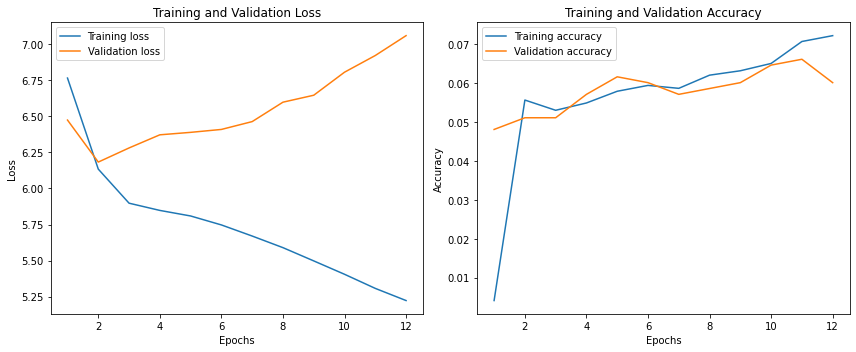

In [19]:
#get the same results every time
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

max_words = 10

# defining the model
def build_multiclass_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Build the model
model = build_multiclass_model()

# Train the model
history = model.fit(
    partial_x_train,
    tf.keras.utils.to_categorical(partial_y_train, num_classes=num_classes),
    epochs=100,
    batch_size=128,
    validation_data=(x_val, tf.keras.utils.to_categorical(y_val, num_classes=num_classes)),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )]
)

# Extracting loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(loss) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


By observing the Loss plot, we can see that although the training loss is diminishing, the validation loss is increasing after 2 epochs, which is one of the signs of overfitting. Also, the accuracy is not very high. In the next cells, we will try to avoid overfitting by adding regularizers and drop out (two methods for solving overfitting issues). I will try to tweak the learning rate of the regularizers and the dropout to achieve the best results. It is always good to start with a lower amount and increase it slowly. L2 regularization aplication is to "combats overfitting by forcing weights to be small, but not making them exactly"<sup>[<a href="https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization#:~:text=L2%20regularization%2C%20or%20the%20L2,not%20making%20them%20exactly%200.">Link</a>]</sup> defined by Kurtis Pykes.

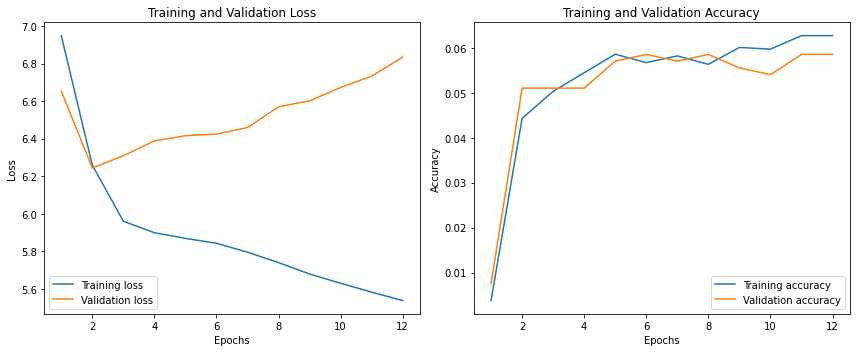

In [20]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# defining the model
def build_multiclass_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Build the model
model = build_multiclass_model()

# Train the model
history = model.fit(
    partial_x_train,
    tf.keras.utils.to_categorical(partial_y_train, num_classes=num_classes),
    epochs=100,
    batch_size=128,
    validation_data=(x_val, tf.keras.utils.to_categorical(y_val, num_classes=num_classes)),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )]
)

# Extracting loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(loss) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


By adding an L2 regularizer with an amount of 0.001 the loss plot on the validation data still looks the same. The loss decreases very little with a similar number of epochs but still shows overfitting. The accuracy of the model is still under 10%. I am going to increase the L2 amount in the next cell.

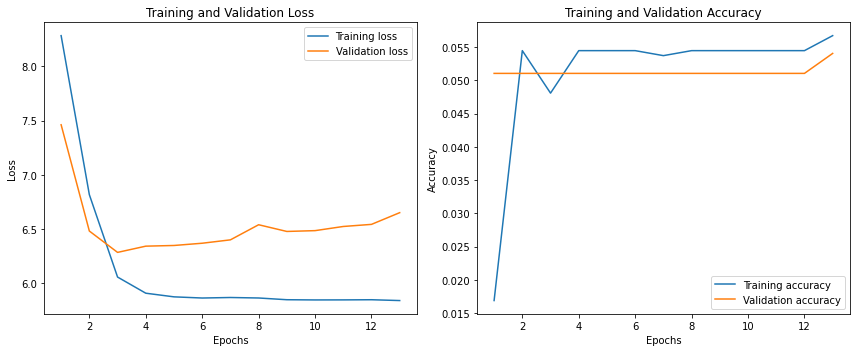

In [21]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# defining the model
def build_multiclass_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Build the model
model = build_multiclass_model()

# Train the model
history = model.fit(
    partial_x_train,
    tf.keras.utils.to_categorical(partial_y_train, num_classes=num_classes),
    epochs=100,
    batch_size=128,
    validation_data=(x_val, tf.keras.utils.to_categorical(y_val, num_classes=num_classes)),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )]
)

# Extracting loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(loss) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Increasing the L2 regularizer to 0.01 made more problems instead of making it better. Our validation loss still increased after 3 epochs and the validation accuracy was consistent without improvement, which is a total disaster. As the L2 regularizer did not end up with good results I am going to use drop out in the next cell to see if it helps. The dropout rate is defined by Jason Brownlee as: "The default interpretation of the dropout hyperparameter is the probability of training a given node in a layer, where 1.0 means no dropout, and 0.0 means no outputs from the layer. A good value for dropout in a hidden layer is between 0.5 and 0.8. Input layers use a larger dropout rate, such as 0.8."<sup>[<a href="https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/#:~:text=and%20recurrent%20connections.-,Dropout%20Rate,rate%2C%20such%20as%20of%200.8.">Link</a>]</sup>


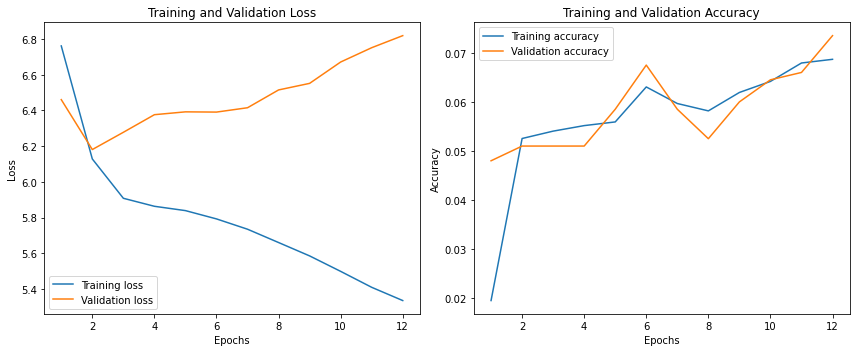

In [22]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# defining the model
def build_multiclass_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
        Flatten(),
        Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Build the model
model = build_multiclass_model()

# Train the model
history = model.fit(
    partial_x_train,
    tf.keras.utils.to_categorical(partial_y_train, num_classes=num_classes),
    epochs=100,
    batch_size=128,
    validation_data=(x_val, tf.keras.utils.to_categorical(y_val, num_classes=num_classes)),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )]
)

# Extracting loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(loss) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


A drop-out layer with a 0.2 rate is added to our model after the first dense layer. We can see in the plot that the accuracy is improving which is a good sign that our model is learning but the validation loss is skyrocketing which indicates overfitting. In the next cell, I will change the amount of drop out.

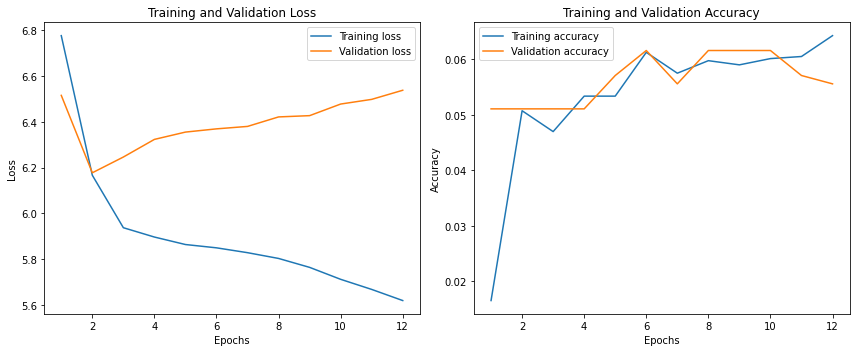

In [23]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# defining the model
def build_multiclass_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
        Flatten(),
        Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Build the model
model = build_multiclass_model()

# Train the model
history = model.fit(
    partial_x_train,
    tf.keras.utils.to_categorical(partial_y_train, num_classes=num_classes),
    epochs=100,
    batch_size=128,
    validation_data=(x_val, tf.keras.utils.to_categorical(y_val, num_classes=num_classes)),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )]
)

# Extracting loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(loss) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Although the validation loss is still increasing after 2 epochs we can see that the slope changed and increased at a slower rate. I am going to add another dropout layer in the next cell before our output layer.

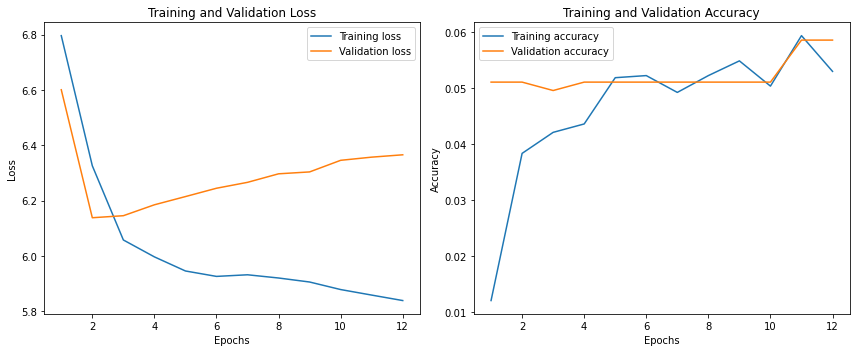

In [24]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# defining the model
def build_multiclass_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
        Flatten(),
        Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Build the model
model = build_multiclass_model()

# Train the model
history = model.fit(
    partial_x_train,
    tf.keras.utils.to_categorical(partial_y_train, num_classes=num_classes),
    epochs=100,
    batch_size=128,
    validation_data=(x_val, tf.keras.utils.to_categorical(y_val, num_classes=num_classes)),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )]
)

# Extracting loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(loss) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


By adding two dropout layers with an amount of 0.5 our model loss is still increasing and overfits. The validation accuracy is also not improving and is somehow constant in the first 10 epochs.
Eventually, even by adding regulizer and dropouts the model still overfitts and the accuracy is around 6%. In the next phase, we will redefine our data to lower the number of possible outcomes and lower the number of last-layer nodes. By decreasing the number of combinations we can make our data easier to. identify and classify.

## 4.2. Sequential - Binary Labelled
<a id="binary-label"></a>

In the previous attempt, our model was trying to learn from a given combination of genres from our data set. The number of combinations was huge, and our model could not learn from it. In this section, I will try to define my data as a binary classification. So if a movie title consists of 3 different genres, for each of those 1 will be assigned and for those that do not occur for the title a 0. A small piece of our data frame after these changes will be shown in the following cells.

The idea for this came from an [Article](https://www.analyticsvidhya.com/blog/2021/08/easy-hyperparameter-tuning-in-neural-networks-using-keras-tuner/) by Deepanshi that tried to classify movies from a short description of them.

In the next cell, we will first identify the genres that exist in our data set. The data frame that we got the genres from had `\xa0` after each genre and was separated by a comma. First, we will replace `\xa0` with empty spaces and then try to find the unique geners.

In [25]:

try:
    # Check if the 'Genre' column exists in the data frame
    if 'Genre' not in known_genre_df.columns:
        raise ValueError("The 'Genre' column is missing in the DataFrame.")

    # Clean and extract unique genres from the dataset
    unique_genres = set()
    for genres in known_genre_df['Genre'].apply(lambda x: x.replace('\xa0', '').split(',')):
        unique_genres.update(genres)

    # Check if there are no unique genres
    if not unique_genres:
        raise ValueError("No unique genres found in the 'Genre' column.")

    # Set the number of classes
    num_classes = len(unique_genres)

    # Display the unique genres
    print(unique_genres)
    print("Number of unique genres:", num_classes)

except ValueError as ve:
    print(f"ValueError: {ve}")
except Exception as e:
    print(f"An unexpected error occurred: {e}.")


{'Horror', 'Documentary', 'Animation', 'History', 'War', 'Romance', 'TV Movie', 'Adventure', 'Drama', 'Action', 'Western', 'Science Fiction', 'Music', 'Thriller', 'Mystery', 'Family', 'Comedy', 'Fantasy', 'Crime'}
Number of unique genres: 19


In [27]:
import pandas as pd

# Create a data frame with 19 columns each representing a genre
genre_columns = list(unique_genres)
genre_transpose_df = pd.DataFrame(0, columns=genre_columns, index=known_genre_df.index)

# Iterate through each movie's genre list and set the corresponding genre columns to 1
for idx, genres in enumerate(known_genre_df['Genre'].apply(lambda x: x.replace('\xa0', '').split(','))):
    genre_transpose_df.loc[idx, genres] = 1

In [28]:
Binary_label_df = pd.concat([ known_genre_df[['Movies']], genre_transpose_df], axis=1)
Binary_label_df.head(3)

,Movies,Horror,Documentary,Animation,History,War,Romance,TV Movie,Adventure,Drama,Action,Western,Science Fiction,Music,Thriller,Mystery,Family,Comedy,Fantasy,Crime
0,How the Grinch Stole Christmas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
1,Mission: Impossible II,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2,Gladiator,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0


In the above cell, The first 3 examples of our data frame are shown. For each 1 in front of the title, that movie is described as that genre. In the next this data frame is saved in case of any further changes or loss.

In [14]:
# saving data frame
Binary_label_df.to_csv('Binary_label_df.csv', index=False, encoding='utf-8')

In [29]:
Binary_label_df = pd.read_csv('Binary_label_df.csv')

Here is our model for this new data set. The big difference between this model and the previous one is that we are using the sigmoid function in the last layer (output layer) because our data is now binary and also changed the loss to 'binary_crossentropy' for the same reason. Our data is split into training and validation data same as before and the model is still sequential. In the next cell, no dropout or regularizer is defined in the first attempt to see how is our base model evaluation. 

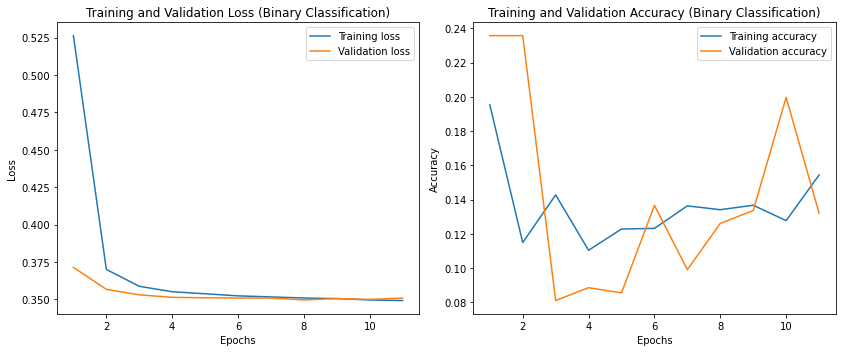

In [30]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Extract features and labels
x_train_binary = Binary_label_df['Movies']
y_train_binary = Binary_label_df.drop('Movies', axis=1)  # Use all columns except 'Movies' as labels

# Tokenize the movie titles
max_words_binary = 10
tokenizer_binary = Tokenizer(num_words=max_words_binary, oov_token="<OOV>")
tokenizer_binary.fit_on_texts(x_train_binary)

# Convert movie titles to sequences
x_train_seq_binary = tokenizer_binary.texts_to_sequences(x_train_binary)

# Pad sequences to have the same length
max_length_binary = max(len(seq) for seq in x_train_seq_binary)
x_train_padded_binary = pad_sequences(x_train_seq_binary, maxlen=max_length_binary, padding='post')

# Splitting data into training and validation
partial_x_train_binary, x_val_binary, partial_y_train_binary, y_val_binary = train_test_split(
    x_train_padded_binary, y_train_binary, test_size=0.2, random_state=20
)

# for the number of output layer neurons
num_classes_binary = len(y_train_binary.columns)

# defining binary classification model
def build_binary_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()

    model_binary = Sequential([
        Embedding(input_dim=max_words_binary, output_dim=128, input_length=max_length_binary),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes_binary, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])

    model_binary.compile(optimizer='adam',
                         loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
                         metrics=['accuracy'])

    return model_binary

# Build model
model_binary = build_binary_model()

# Train
history_binary = model_binary.fit(
    partial_x_train_binary,
    partial_y_train_binary,
    epochs=100,
    batch_size=128,
    validation_data=(x_val_binary, y_val_binary),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)

# Extracting loss values
loss_binary = history_binary.history['loss']
val_loss_binary = history_binary.history['val_loss']

# Extracting accuracy values
accuracy_binary = history_binary.history['accuracy']
val_accuracy_binary = history_binary.history['val_accuracy']

# Number of epochs
epochs_binary = range(1, len(loss_binary) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs_binary, loss_binary, label='Training loss')
plt.plot(epochs_binary, val_loss_binary, label='Validation loss')
plt.title('Training and Validation Loss (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_binary, accuracy_binary, label='Training accuracy')
plt.plot(epochs_binary, val_accuracy_binary, label='Validation accuracy')
plt.title('Training and Validation Accuracy (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Compared to the previous model, our accuracy is much higher and the loss is not decreasing. We can see that the model stopped by early stopping due to not improving accuracy after waiting 10 epochs. We can see that in the first 2 epochs was tended to overfit as the accuracy was consistent and then started to learn. However, this learning caused a huge drop in the value of accuracy after 2 epochs from nearly 24% to 8%.In the next cell, I will try to modify my model to get better results.

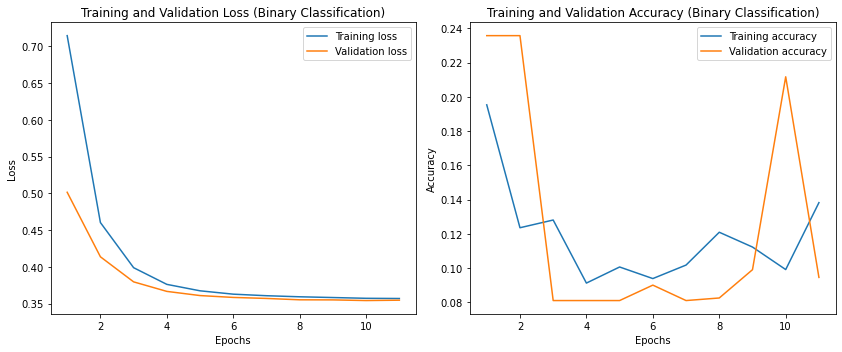

In [31]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# defining binary classification model
def build_binary_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()

    model_binary = Sequential([
        Embedding(input_dim=max_words_binary, output_dim=128, input_length=max_length_binary),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(64, activation='relu'),
        Dense(num_classes_binary, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])

    model_binary.compile(optimizer='adam',
                         loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
                         metrics=['accuracy'])

    return model_binary

# Build the binary classification model
model_binary = build_binary_model()

# Train
history_binary = model_binary.fit(
    partial_x_train_binary,
    partial_y_train_binary,
    epochs=100,
    batch_size=128,
    validation_data=(x_val_binary, y_val_binary),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)

# Extracting loss values
loss_binary = history_binary.history['loss']
val_loss_binary = history_binary.history['val_loss']

# Extracting accuracy values
accuracy_binary = history_binary.history['accuracy']
val_accuracy_binary = history_binary.history['val_accuracy']

# Number of epochs
epochs_binary = range(1, len(loss_binary) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs_binary, loss_binary, label='Training loss')
plt.plot(epochs_binary, val_loss_binary, label='Validation loss')
plt.title('Training and Validation Loss (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_binary, accuracy_binary, label='Training accuracy')
plt.plot(epochs_binary, val_accuracy_binary, label='Validation accuracy')
plt.title('Training and Validation Accuracy (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


We added an L2 regularizer with an amount of 0.001 to our first dense layer. We can see that the accuracy is not improving much and seems like it becomes harder for our model to learn. The model accuracy fluctuates between 8% to 10% from epoch 5 to 9 and again drops after epoch 10. Using the L2 does not seem to be a wise choice for our model. I am going to increase the amount of L2 just for the sake of the experiment to see how worse it could be.

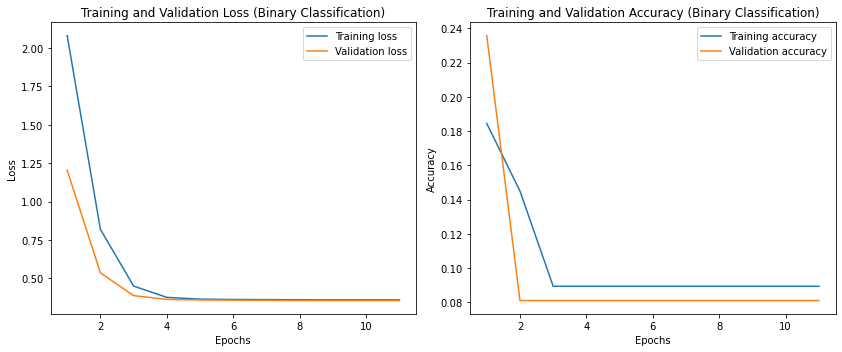

In [32]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# defining binary classification model
def build_binary_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()

    model_binary = Sequential([
        Embedding(input_dim=max_words_binary, output_dim=128, input_length=max_length_binary),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dense(64, activation='relu'),
        Dense(num_classes_binary, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])

    model_binary.compile(optimizer='adam',
                         loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
                         metrics=['accuracy'])

    return model_binary

# Build the binary classification model
model_binary = build_binary_model()

# Train
history_binary = model_binary.fit(
    partial_x_train_binary,
    partial_y_train_binary,
    epochs=100,
    batch_size=128,
    validation_data=(x_val_binary, y_val_binary),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)

# Extracting loss values
loss_binary = history_binary.history['loss']
val_loss_binary = history_binary.history['val_loss']

# Extracting accuracy values
accuracy_binary = history_binary.history['accuracy']
val_accuracy_binary = history_binary.history['val_accuracy']

# Number of epochs
epochs_binary = range(1, len(loss_binary) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs_binary, loss_binary, label='Training loss')
plt.plot(epochs_binary, val_loss_binary, label='Validation loss')
plt.title('Training and Validation Loss (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_binary, accuracy_binary, label='Training accuracy')
plt.plot(epochs_binary, val_accuracy_binary, label='Validation accuracy')
plt.title('Training and Validation Accuracy (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


As predicted our model is underfitting by using a 0.01 L2 amount and do not learn anything. We can find it out by looking at the accuracy plot which both training accuracy and validation accuracy are changeless. In the next cell, I will omit regularizers and add a drop-out layer to my model.

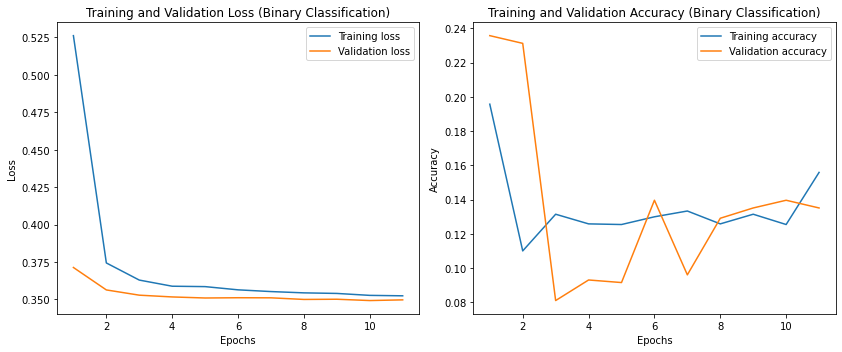

In [33]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# defining binary classification model
def build_binary_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()

    model_binary = Sequential([
        Embedding(input_dim=max_words_binary, output_dim=128, input_length=max_length_binary),
        Flatten(),
        Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(num_classes_binary, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])

    model_binary.compile(optimizer='adam',
                         loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
                         metrics=['accuracy'])

    return model_binary

# Build the binary classification model
model_binary = build_binary_model()

# Train
history_binary = model_binary.fit(
    partial_x_train_binary,
    partial_y_train_binary,
    epochs=100,
    batch_size=128,
    validation_data=(x_val_binary, y_val_binary),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)

# Extracting loss values
loss_binary = history_binary.history['loss']
val_loss_binary = history_binary.history['val_loss']

# Extracting accuracy values
accuracy_binary = history_binary.history['accuracy']
val_accuracy_binary = history_binary.history['val_accuracy']

# Number of epochs
epochs_binary = range(1, len(loss_binary) + 1)

# Plotting loss and accuracy for binary classification
plt.figure(figsize=(12, 5))

# Plotting
plt.subplot(1, 2, 1)
plt.plot(epochs_binary, loss_binary, label='Training loss')
plt.plot(epochs_binary, val_loss_binary, label='Validation loss')
plt.title('Training and Validation Loss (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_binary, accuracy_binary, label='Training accuracy')
plt.plot(epochs_binary, val_accuracy_binary, label='Validation accuracy')
plt.title('Training and Validation Accuracy (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


We can see that the model is not underfitting and starts learning but compared to our base model the validation accuracy is not becoming much higher. Meanwhile, the validation loss is achieving less value from the beginning which is not an ordinary behaviour from a model. I am going to change the dropout rate in the next cell to see the changes.

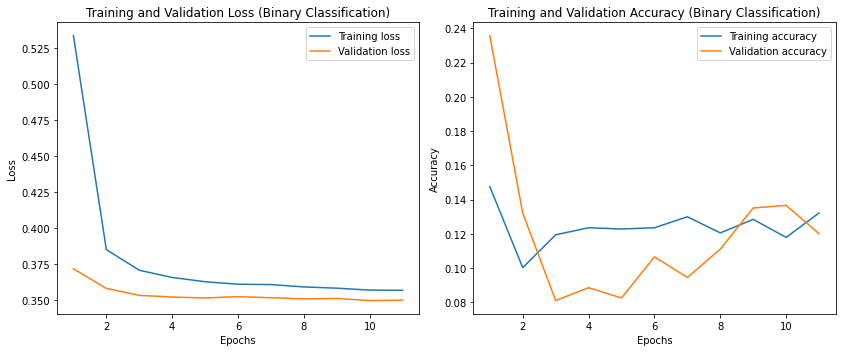

In [34]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# defining binary classification model
def build_binary_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()

    model_binary = Sequential([
        Embedding(input_dim=max_words_binary, output_dim=128, input_length=max_length_binary),
        Flatten(),
        Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(num_classes_binary, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])

    model_binary.compile(optimizer='adam',
                         loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
                         metrics=['accuracy'])

    return model_binary

# Build the binary classification model
model_binary = build_binary_model()

# Train
history_binary = model_binary.fit(
    partial_x_train_binary,
    partial_y_train_binary,
    epochs=100,
    batch_size=128,
    validation_data=(x_val_binary, y_val_binary),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)

# Extracting loss values
loss_binary = history_binary.history['loss']
val_loss_binary = history_binary.history['val_loss']

# Extracting accuracy values
accuracy_binary = history_binary.history['accuracy']
val_accuracy_binary = history_binary.history['val_accuracy']

# Number of epochs
epochs_binary = range(1, len(loss_binary) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs_binary, loss_binary, label='Training loss')
plt.plot(epochs_binary, val_loss_binary, label='Validation loss')
plt.title('Training and Validation Loss (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_binary, accuracy_binary, label='Training accuracy')
plt.plot(epochs_binary, val_accuracy_binary, label='Validation accuracy')
plt.title('Training and Validation Accuracy (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


By changing our dropout rate our validation accuracy is still less than our base model without any regularizers and dropouts. The distance between our validation loss and training loss is becoming more compared to the previous attempt.

It seems like even after defining the output possibilities as binary, our model is still struggling with finding a relation between the genre and the title. In order to make the data more understandable and easier I am going to change the data to a single labelled format in the next section so that each movie title relates to only one genre.

## 4.3. Sequential - Single Labelled
<a id="single-label"></a>

To increase the accuracy and make our model easier, we will reduce the genres of the movies to one, so that our model has to only predict one genre for each movie title. We have to decide which genre should we keep for movies. We can make a logic for this shrinkage, for example, if there is an occurrence of 'animation' in a movie's genre keep the 'animation' only and remove every other genre, or if there is an occurrence of adventure and comedy together keep the adventure (movies like Jumanji) and similar logics base on the actual movie. By using this method my own idea would be applied to choose between genes.

Instead, I used the [IMDb classification logic](https://help.imdb.com/article/contribution/titles/genres/GZDRMS6R742JRGAG#) for this genre shrinkage. The logic behind the classification of movies in IMDb is user-based, IMDb users have to decide a main genre and some subgenre and vote for them. In the end, based on the votes a movie will be classified as its main genre represented first and other subgenres in the following. So, I will keep the first genre for each movie and delete the others. 

To avoid any changes in our initial data frame, I made a copy of it and kept the first elements of genres ( genres are separated by a comma).

In [35]:
modify_df = known_genre_df.copy()

In [36]:
try:
    # Check if the 'modify_df' data frame exists
    if 'modify_df' not in locals() or 'modify_df' not in globals():
        raise ValueError("The dataframe you are looking for is not defined, load or create it.")

    # Check if the 'Genre' column exists in the data frame
    if 'Genre' not in modify_df.columns:
        raise ValueError("The 'Genre' column is missing in the data frame.")

    # Check if the 'Genre' column has any missing values
    if modify_df['Genre'].isnull().any():
        raise ValueError("Missing values found in the 'Genre' column.")

    # Extract the first genre from the 'Genre' column
    modify_df['Genre'] = modify_df['Genre'].str.split(',').str[0]

    # display
    display(modify_df.head(5))

except KeyError as ke:
    print(f"KeyError: {ke}. Check if the 'Genre' column exists in the dataframe.")
except ValueError as ve:
    print(f"ValueError: {ve}")
except Exception as e:
    print(f"An unexpected error occurred: {e}.")


,Unnamed: 0,Movies,theater sale,total gross,distributor,Year,Genre
0,0,How the Grinch Stole Christmas,5828.24,465480236.8,Universal Pictures,2000,Family
1,1,Mission: Impossible II,6567.51,385583701.3,Paramount Pictures,2000,Adventure
2,2,Gladiator,5706.52,335992714.3,DreamWorks Distribution,2000,Action
3,3,The Perfect Storm,6098.53,326886996.9,Warner Bros.,2000,Action
4,4,Meet the Parents,4827.63,297576840.6,Universal Pictures,2000,Comedy


We can see above what our data will look like after single labelling.

In [7]:
#saving the data frame
modify_df.to_csv('single_labeled.csv', index=False, encoding='utf-8')

In [37]:
#read the data frame
Main_df = pd.read_csv("single_labeled.csv")

In [38]:
#showing the unique genres
unique_genres = Main_df['Genre'].unique()
num_unique_genres = len(unique_genres)

print("Number of unique genres:", num_unique_genres)
print("Unique genres:", unique_genres)

Number of unique genres: 19
Unique genres: ['Family' 'Adventure' 'Action' 'Comedy' 'Drama' 'Fantasy' 'Crime'
 'Animation' 'Horror' 'Thriller' 'War' 'Science Fiction' 'TV Movie'
 'Mystery' 'Romance' 'Music' 'Western' 'Documentary' 'History']


### 4.3.1. Visualizing Single Labelled Data
<a id="single-label-vis"></a>

The distribution of each genre is being shown again after single labelling, as our data is not distributed equally and we want to find out which genres are more likely to be predicted by our model, I used a pie chart and a word cloud in the end too as visualization of our data. We can see in the next cells that Drama has the highest probability of 21.1%. I avoided showing the genres that their share is under 1%.

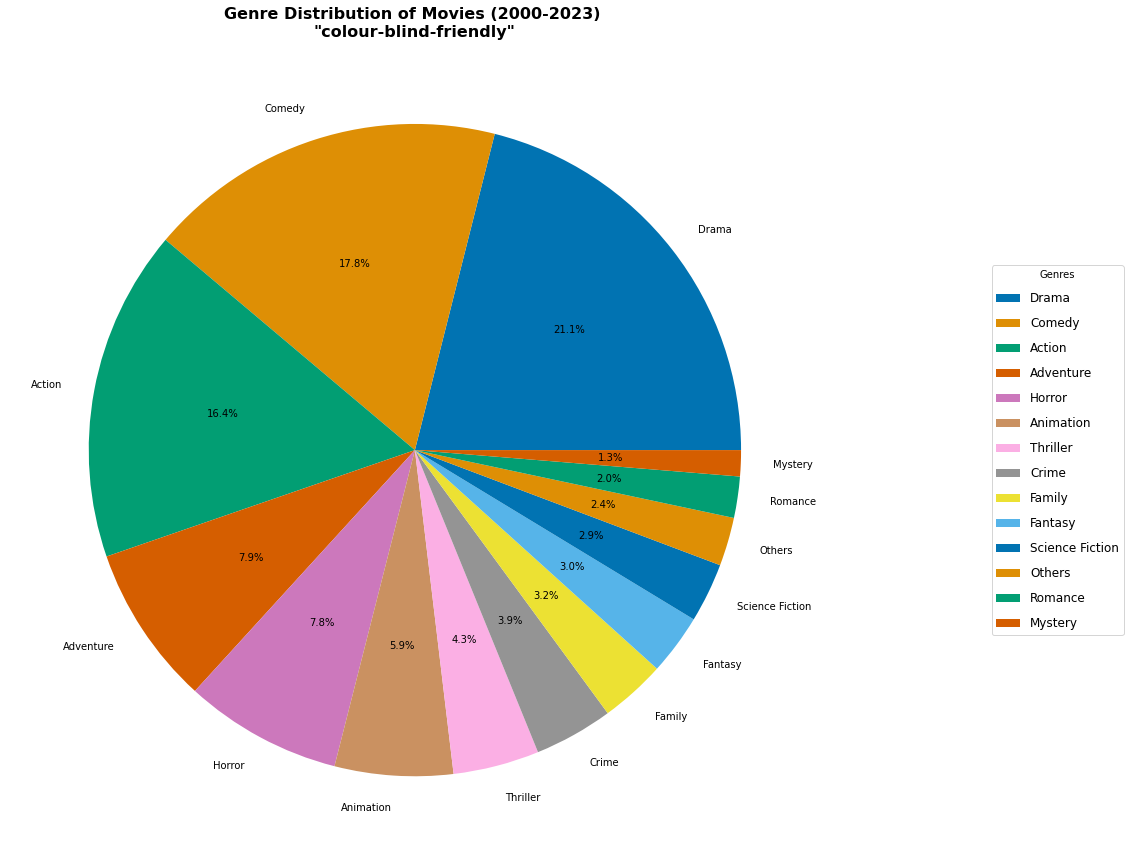

In [39]:
# Calculate genre counts
genre_counts = Main_df['Genre'].value_counts()


# Identify genres that are below the threshold
small_genres = genre_counts[genre_counts / genre_counts.sum() * 100 < 1].index

# Combine small genres into 'Others'
Main_df['Genre'] = Main_df['Genre'].apply(lambda x: 'Others' if x in small_genres else x)

# Recalculate genre counts after combining small genres
genre_counts = Main_df['Genre'].value_counts()

# pie chart
plt.figure(figsize=(15, 15))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=sns.color_palette('colorblind'))
plt.title('Genre Distribution of Movies (2000-2023) \n"colour-blind-friendly"', y=1, fontsize=16, fontweight='bold')
plt.gca().set_aspect('equal')  # Equal aspect ratio

# the legend
plt.legend(genre_counts.index, loc='center left', bbox_to_anchor=(1.2, 0.5), title='Genres', labelspacing=1, fontsize='large')
plt.show()


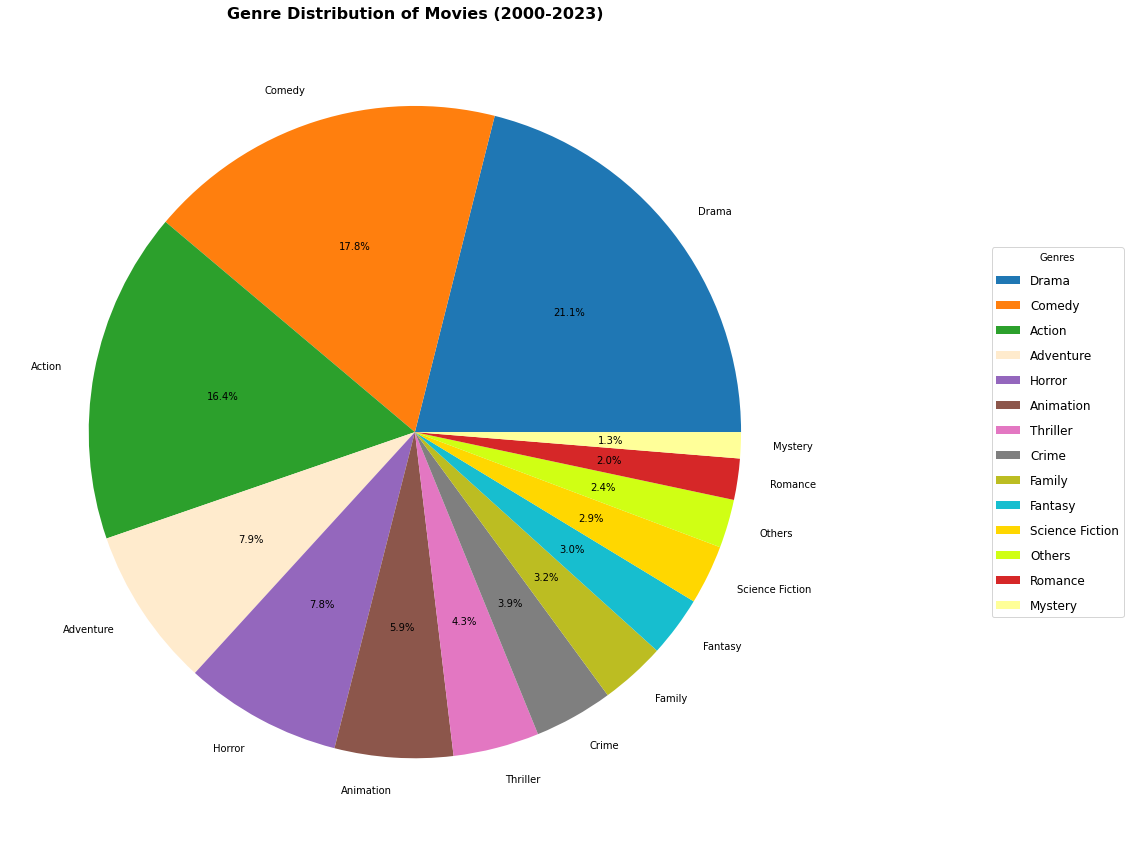

In [40]:
custom_colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#FFEBCD', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F',
                 '#BCBD22', '#17BECF', '#FFD700','#D0FF14', '#D62728', '#FFFF99', '#00CC99', '#B2FFFF', '#00FF40']

plt.figure(figsize=(15, 15))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Genre Distribution of Movies (2000-2023)',  y=1, fontsize=16, fontweight='bold')
plt.gca().set_aspect('equal')

#the legend
plt.legend(genre_counts.index, loc='center left', bbox_to_anchor=(1.2, 0.5), title='Genres', labelspacing=1, fontsize='large')
plt.show()


From the above pie we can find out the Drama, Comedy and Action are accrued more than others. So It might be more probable for our model to predict unseen data to one of these. In estimating how well a model is working f1 score is used in unequal distributed data. The baseline accuracy for our model would be the most probable genre (in our case Drama).

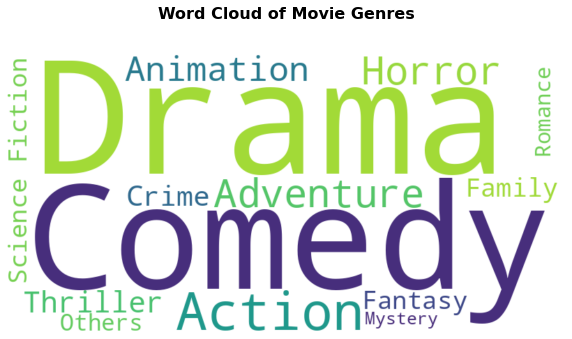

In [41]:
text = ' '.join(Main_df['Genre'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=True, colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.subplots_adjust(top=0.9)
plt.title('Word Cloud of Movie Genres', y=1.1, fontsize=16, fontweight='bold')
plt.show()


### 4.3.2. Single Labelled Model
<a id="single-label-model"></a>

The model that we used in the following is sequential similar to before, The changes are in the data set not in the model. Our data is split into validation and training sets same as before. In each attempt, I tried to get a better accuracy or decrease the loss by adding regularizers and dropouts. We are using 'softmax' as the last layer activation function and 'sparse_categorical_crossentropy' for the loss as our data is not binary any more.

In [42]:
x_train = Main_df['Movies']
y_train = Main_df['Genre']


# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Tokenize the movie titles
max_words = 10
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Splitting data into training and validation
partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train_padded, y_train_encoded, test_size=0.2, random_state=20
)

# for the number of output layer neurons
num_classes = len(np.unique(y_train_encoded))

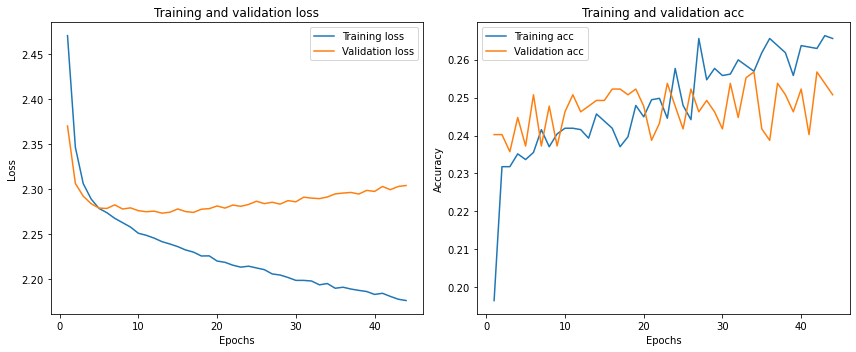

In [43]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


Our model's accuracy is much higher than before and reaches nearly 28%. Although the validation loss is growing which is not a good sign and indicates overfitting. We need to control this overfitting by using regularizers and dropouts. In the next cell, I will apply the L2 regularizer and check its effect on the model.

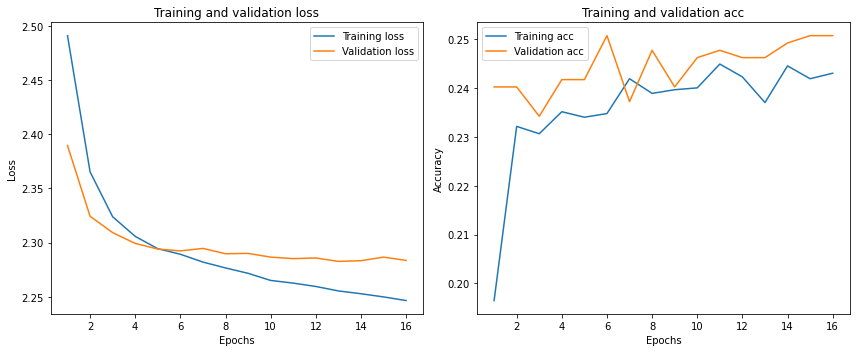

In [44]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


We can see that by using an L2 regularizer with the value of 0.001 the validation loss is much better than before and decreasing. Our optimal state is that the validation loss line decreases like training loss. I am going to change the L2 value in the next cell to see if we can decrease the validation loss even more. 

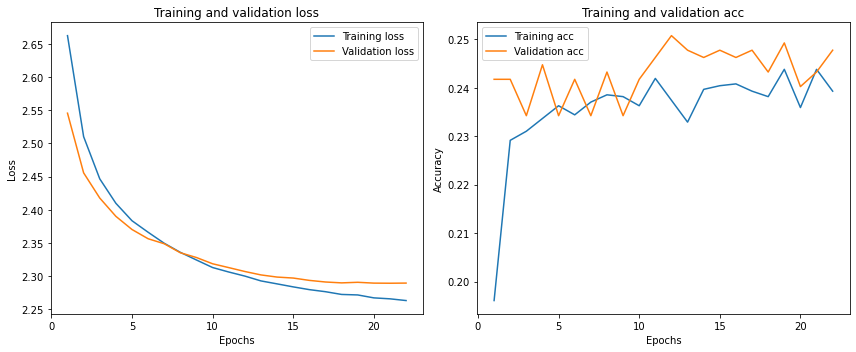

In [45]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


The validation loss with an L2 regularizer with a 0.01 value is much better than before. The validation accuracy is somehow around the training set. In the next cell, I will add a drop out to see if it makes my model better or not.

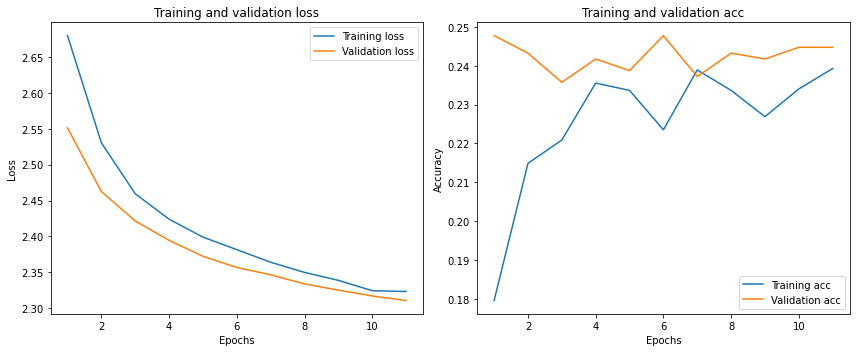

In [46]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


I added a dropout layer with a value of 0.2 before the last layer. The validation loss is decreasing but the validation accuracy is not improving significantly. Therefore, our defined early stopping rule stopped the training after 10 epochs. In the next cell, I will change the dropout rate to see the changes.

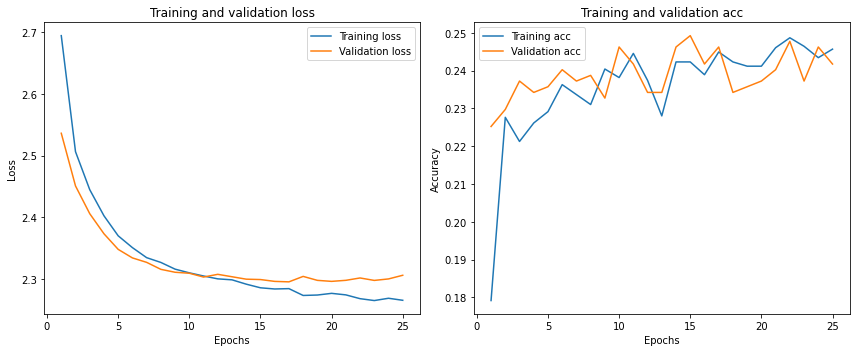

In [47]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l1(0.001) ,activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


In the above, we can observe the effect of 0.1 instead of 0.2. Our training continues more than the previous one while the accuracy is not higher than the previous one in the end. The validation loss also starts to be somehow stable after 10 epochs. In the following, I am going to increase the value of dropout and see the differences.

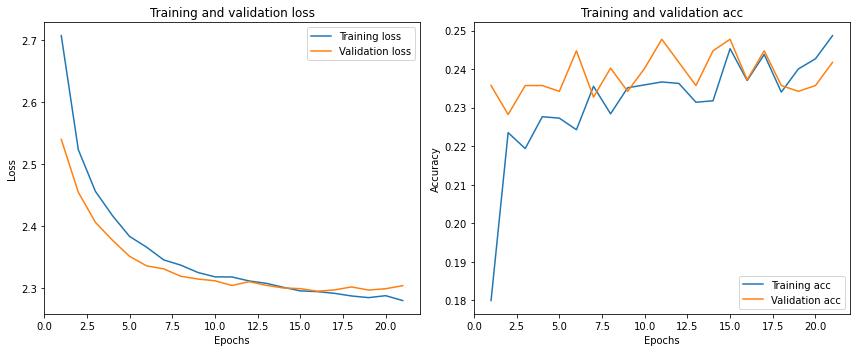

In [48]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l1(0.001) ,activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


The drop rate above was 0.3 which was higher than the 2 previous dropout values. The accuracy and loss of our validation set are still the same but occurred in a different epoch. Validation loss starts to be stable after 12.5 epochs which in the previous one was around 10 epochs. The validation accuracy reaches nearly 24 percent in 20 epochs while the same value of accuracy is reached in 25 epochs. Here I think It is better to reach our desired results and our model covers as fast as it can (less epochs). It might not be perceptible in our model as our data is not very big but it would definitely play a key role in big data.

I will use an L1 regularizer in the next cell without any dropouts in the cell. On COLLIMATOR website stated that "One key difference between L1 and L2 regularization is their impact on the output of the model. L1 regularization tends to set some parameter coefficients to zero, leading to sparser models. On the other hand, L2 regularization encourages small, non-zero parameter coefficients, resulting in models with less sparsity"<sup>[<a href="https://www.collimator.ai/reference-guides/what-is-l1-vs-l2-regularization#:~:text=One%20key%20difference%20between%20L1,in%20models%20with%20less%20sparsity.">Link</a>]</sup>


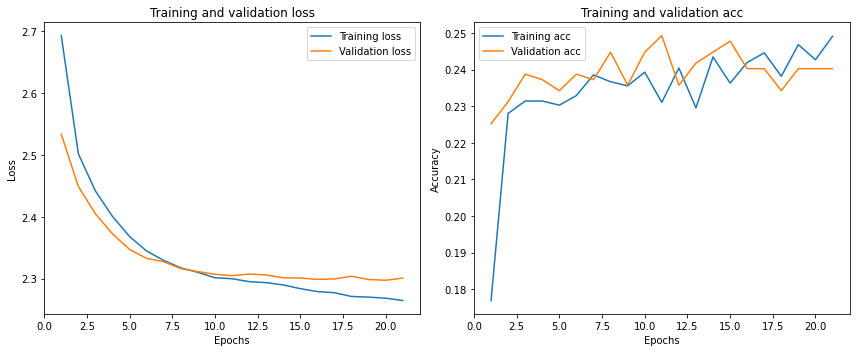

In [49]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l1(0.001) ,activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


We can see that an L1 regularizer with a value of 0.001 also has the same impact as the L2 regularizer. Again, the speed of convergence to a similar accuracy and validation loss in our creation of choosing which model is better in this state.

In this section, I tried different rates of dropouts and regularizers for my data and checked the effects of them. Our model accuracy stopped increasing in the first 20 epochs which means our model stops learning after 20 epochs. I will try to increase the accuracy of my model by providing more data for it without actually providing another external database for it but using the existing one in the upcoming section.

# 5. Augmentation
<a id="augment"></a>

When we are trying to achieve better results in our models, our best option for this improvement is collecting more data. In some cases, we do not have access to more data. There are some techniques to increase the number of our data without adding new data. The idea of the following sections came to my mind after the convolutional layers and the use of computer vision in Jeremie Wenger's AI class and regarded to [François Chollet - Deep Learning with Python book](https://www.manning.com/books/deep-learning-with-python-second-edition). In this technique of picture recognition, when we do not have access to more data, the current data is modified and used as new data for our model.

An example would be a picture of a dog which rotated and flipped vertically and horizontally. For us as humans, all of those pictures are defined as one picture but for the model they are different. Based on this idea I have two approaches to increase the number of my data.
- Augmentation by Synonym
- Augmentation by Case Conversion

## 5.1. Augmentation by Synonym
<a id="augment-syn"></a>

Movies' titles are usually between 2 to 5 characters, I will try to make new movie titles by using the NLTK synonym library and labelling the new combinations just like the original one. In the end, both the original and the synonym augmented data are added together for prediction. If I wanted to keep all the synonym combinations of my data, it would be 8305259 elements with a volume of 440 MB. It would take a long to process that data and also my project would become more than 10Mb. Therefore, I only kept the first 3 combinations of each movie title which leads to 14582 movie titles from 4285 titles.

In [53]:
# get synonyms of a word using NLTK WordNet
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return list(synonyms)[:3]  # Limit to the first 3 synonyms

# Create a new data frame to store the results
columns = ['Movies', 'Genre', 'SynonymCombination']
result_rows = []

# iterate through each row in the original data frame
for index, row in Main_df.iterrows():
    movie_title = row['Movies']
    genre = row['Genre']

    # get synonyms for each movie title
    synonyms_list = [get_synonyms(word) for word in movie_title.split()]

    # Generate all combinations of synonyms
    synonym_combinations = list(product(*synonyms_list))

    # create rows for the result data frame to relate to the original title
    for synonym_combination in synonym_combinations:
        synonym_combination_str = ' '.join(synonym_combination)
        result_rows.append({'SynonymCombination': synonym_combination_str,  'Genre': genre, 'Movies': movie_title})

        
Augmentsyn_df = pd.DataFrame(result_rows)


display(Augmentsyn_df.head(5))

,SynonymCombination,Genre,Movies
0,gladiator,Action,Gladiator
1,prizefighter,Action,Gladiator
2,chilling pic,Comedy,Scary Movie
3,chilling moving-picture_show,Comedy,Scary Movie
4,chilling motion-picture_show,Comedy,Scary Movie


In the above, we can see 2 examples of this augmentation. For example, the "Scary Movie" changed to "chilling pic", "chilling moving-picture_show" and "chilling motion-picture_show".

In [36]:
Augmentsyn_df.to_csv('Augsyn.csv', index=False, encoding='utf-8')

In [51]:
Augmentsyn_df = pd.read_csv("Augsyn.csv")

The synonyms are now in a different column in the data frame and we want the actual titles and the synonyms to be in one column in continue of each other, we first make a copy of our initial data frame to avoid any changes on it and then add the 'SynonymCombination' and 'Genre' column of our synonym data frame to the copy of initial data frame.

In [52]:
Main_df2 = Main_df.copy()

In [38]:
# Concatenate the data frames vertically
AugmentedSyn_df = pd.concat([Main_df2[['Movies', 'Genre']], Augmentsyn_df[['SynonymCombination', 'Genre']].rename(columns={'SynonymCombination': 'Movies'})])

# Resetting index 
AugmentedSyn_df = AugmentedSyn_df.reset_index(drop=True)

display(AugmentedSyn_df)


,Movies,Genre
0,How the Grinch Stole Christmas,Family
1,Mission: Impossible II,Adventure
2,Gladiator,Action
3,The Perfect Storm,Action
4,Meet the Parents,Comedy
...,...,...
17906,devotion,Others
17907,corsage,Drama
17908,nosegay,Drama
17909,bouquet,Drama


In [39]:
AugmentedSyn_df.to_csv('AugmentedSyn_df.csv', index=False, encoding='utf-8')

In [54]:
AugmentedSyn_df = pd.read_csv("AugmentedSyn_df.csv")

### 5.1.1. Sequential Model with Synonym Augmented Data
<a id="augment-syn-model"></a>

The model and the procedure of this segment are the same as before. We first process our data into a type that our model can handle and then split it into training and validation sets and then use the same structure of the model without any regularizers or dropouts for the first attempt.

In [55]:
x_train = AugmentedSyn_df['Movies']
y_train = AugmentedSyn_df['Genre']


# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Tokenize the movie titles
max_words = 10
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", lower=False)
tokenizer.fit_on_texts(x_train)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Splitting data into training and validation
partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train_padded, y_train_encoded, test_size=0.2, random_state=20
)

# for the number of output layer neurons
num_classes = len(np.unique(y_train_encoded))

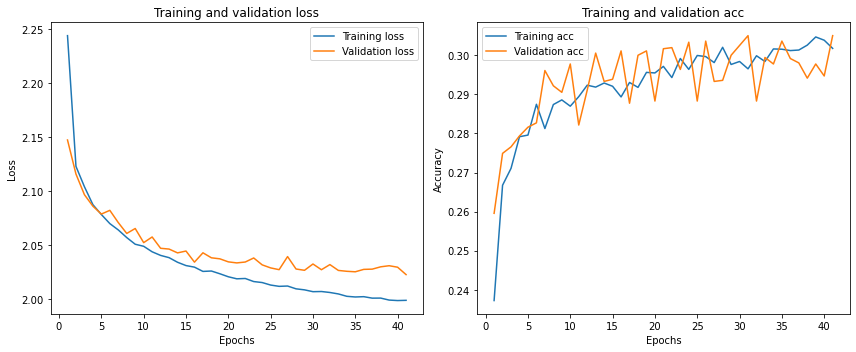

In [56]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer= 'adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


We can see that our model's accuracy is now higher than before and the validation loss diagram is also decreasing in an appropriate sequence. As our model's performance is satisfying in the next cells I try a low amount of regularizer and dropouts just to see if it might make the results better.

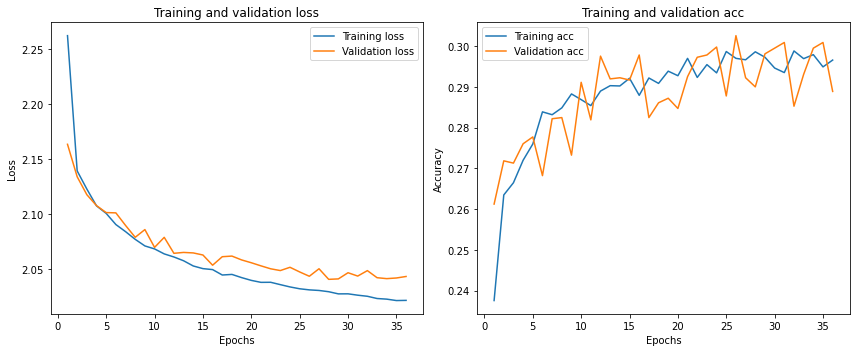

In [57]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer= 'adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


In the previous cell, I added an L2 regularizer with a rate of 0.001. A high amount of dropouts or regularizers can also make our model overfit so we have to be careful with the rate. In the above plot, our model converges to the same results 5 epochs faster than the base model. In the next cell, I will check the impact of adding a dropout layer.

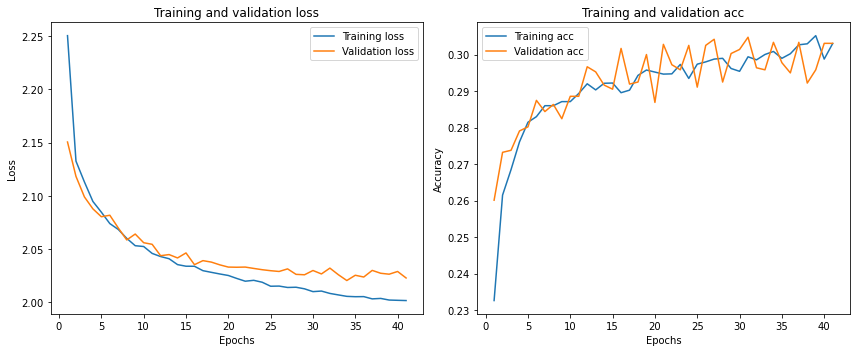

In [58]:

np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer= 'adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


By adding a dropout layer before the last layer that has a rate of 0.1, our accuracy is a little more compared to the same model with an L2 regularizer and the loss is also less.

In the next section, another type of augmentation is being used and the impact of it will be studied.

## 5.2. Augmentation by Case Conversion
<a id="augment-case-convers"></a>

Another way for augmentation that comes to my mind is uppercasing and lowercasing all the characters in a word to make new data. In the end, we will have 3 versions of our title, the original one, all uppercase and all lowercase. We have to tokenize each movie title before passing it through our model we have to make sure that the model treats each of those differently. Therefore, we have to be sure that these words will be tokenized differently from the beginning as by default the tokenizer is not case-sensitive. In the next cell, I showed an example of how our data would be treated.

In [59]:
# Example data
texts = ["gladiator", "GLADIATOR", "Gladiator"]

# Create a tokenizer
tokenizer = Tokenizer(lower=False)
tokenizer.fit_on_texts(texts)

# Tokenize the text
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
padded_sequences = pad_sequences(sequences)

print("Tokenized sequences:", sequences)
print("Padded sequences:\n", padded_sequences)


Tokenized sequences: [[1], [2], [3]]
Padded sequences:
 [[1]
 [2]
 [3]]


In [60]:
Main_df = pd.read_csv("single_labeled.csv")

In [61]:
def augment_text_column(df, column_name):
    # make a copy for lowercase
    df_augmented = df.copy()

    # Convert the titles to lowercase in the duplicated data frame
    df_augmented[column_name] = df_augmented[column_name].str.lower()
    
    # make a copy for uppercase
    df_uppercase = df.copy()

    # Convert the titles to uppercase in the second duplicated data frame
    df_uppercase[column_name] = df_uppercase[column_name].str.upper()

    # Concatenate the original data frame and the two augmented from
    df_final = pd.concat([df, df_augmented, df_uppercase], ignore_index=True)

    return df_final



Main_df_augment = augment_text_column(Main_df, 'Movies')

display(Main_df_augment.tail(5))


,Unnamed: 0,Movies,theater sale,total gross,distributor,Year,Genre
9979,4987,EO,80,1068782.0,Others,2023,Drama
9980,4989,SHIN ULTRAMAN,1040,601490.0,Others,2023,Drama
9981,4997,SWEETWATER,1204,541633.0,Others,2023,Drama
9982,4998,AFTERSUN,97,1658790.0,Others,2023,Drama
9983,4999,CONSECRATION,762,538551.0,Others,2023,Horror


Above is a view from the end of our data frame after case conversion. we can see that all the examples are uppercased at the end of our new data frame.

In [53]:

Main_df_augment.to_csv('Main_df_augment.csv', index=False, encoding='utf-8')

In [62]:

Main_df_augment = pd.read_csv("Main_df_augment.csv")

### 5.2.1 Sequential Model with Case-Conversed Augmented Data
<a id="augment-case-convers-model"></a>

The procedure for making our model is the same as before, as the model has not changed and we change the data. We will first process our data into a type that our model can handle and make sure that the tokenization is case sensitive. Later, split our data into training and validation sets and then used the same structure of the model without any regularizers or dropouts for the first attempt.

In [63]:
x_train = Main_df_augment['Movies']
y_train = Main_df_augment['Genre']

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Tokenize the movie titles
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", lower=False)
tokenizer.fit_on_texts(x_train)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Splitting data into training and validation
partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train_padded, y_train_encoded, test_size=0.2, random_state=20
)

#for the number of output layer neurons
num_classes = len(np.unique(y_train_encoded))

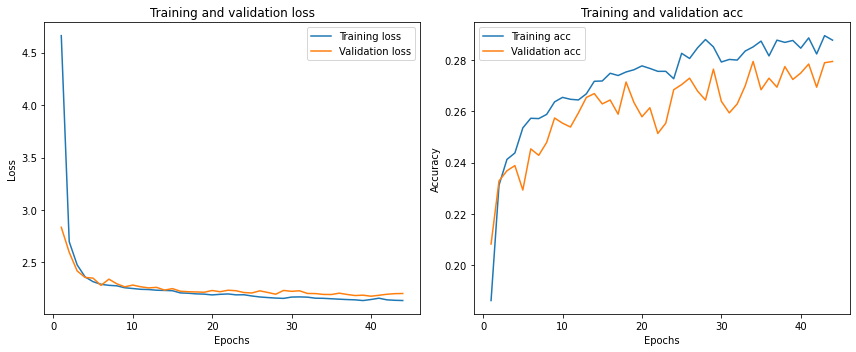

In [64]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer= 'adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


Compared to the previous augmentation method our model's accuracy is slightly lower. The loss amount is also higher and our loss starts to be constant sooner. In the following cells, I will apply regularizers to see the effect and make our accuracy more stable.

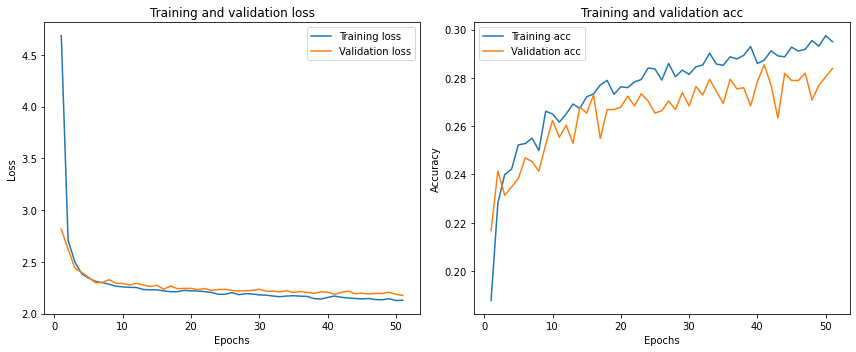

In [65]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer= 'adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


By adding an L2 regularizer we can see that our validation accuracy fluctuates less and act more like our training accuracy. Although, it took 10 more epochs to achieve the same accuracy for our validation set. The training accuracy is slightly more than before but the loss for both validation and training accuracy is the same as before. In the subsequent cell, I will add another layer to our model.

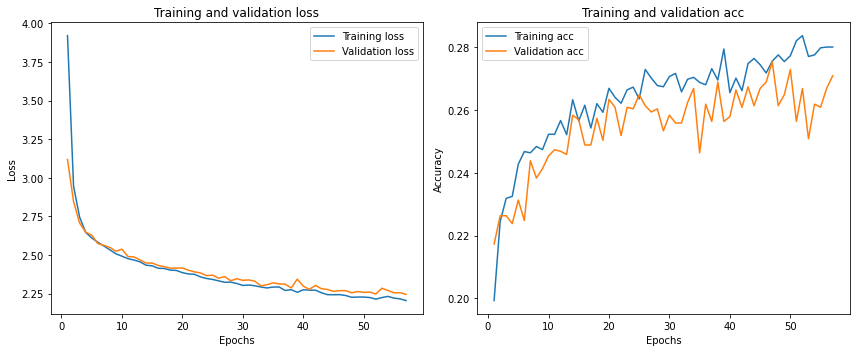

In [66]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation ='softmax')
        ])
    model.compile(optimizer= 'adam',
                        loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
    return model
model = build_model()

#Train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


In the above cell, I added another layer at the beginning of my model with 512 neurons to make my model more complex. Two L2 regularizers were also used in the first and second layers with a rate of 0.001. The loss value decreased during our training contrary to the earlier model but the validation accuracy reached slightly lower in the same number of epochs compared with the earlier model.

We can see that both augmentation techniques' outcome in our model was somehow the same (the synonym augmentation was slightly better). We will try new models for our data from now.

# 6. Simple RNN 
<a id="rnn"></a>

Based on the TensorFlow website "Recurrent neural networks (RNN) are a class of neural networks that is powerful for modelling sequence data such as time series or natural language.
Schematically, an RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far."<sup>[<a href="https://www.tensorflow.org/guide/keras/working_with_rnns">Link</a>]</sup>


## 6.1. Simple RNN Model
<a id="rnn-model"></a>

We are going to use simple RNN layers in our model, the process of preparing the data for feeding it through the model is the same as before. 2 simple RNN layers are defined after the embedding layer. The first one includes an L2 regularizer, dropout and recurrent dropout, while the second one does not have a regularizer. The TensorFlow website mentioned that "By default, the output of an RNN layer contains a single vector per sample. This vector is the RNN cell output corresponding to the last timestep, containing information about the entire input sequence. The shape of this output is (batch_size, units) where units correspond to the units argument passed to the layer's constructor. An RNN layer can also return the entire sequence of outputs for each sample (one vector per timestep per sample) if you set `return_sequences=True`. The shape of this output is (batch_size, timesteps, units)." <sup>[<a href="https://www.tensorflow.org/guide/keras/working_with_rnns#:~:text=A%20RNN%20layer%20can%20also,batch_size%2C%20timesteps%2C%20units)%20.&text=In%20addition%2C%20a%20RNN%20layer,final%20internal%20state(s).">Link</a>]</sup>

I found out that by increasing the number of the `max_words` parameter, the tokenizer considers more unique words and captures more intricate details. Therefore the Embedding layer benefits from a larger vocabulary, as it can create more informative word embeddings. Although it leads to longer training times.

I also evaluate an f1 score after each model in this case. sklearn website explained that "the F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)"<sup>[<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">Link</a>]</sup>

$$
F1 = \frac{2 \times (\text{precision} \times \text{recall})}{\text{precision} + \text{recall}}
$$

F1 score is used on data that is not distributed equally (like our data that Drama is more). The tokenizing, padding and splitting of our data into validation and training sets is the same as before.

Since the synonym augmented data reached the best accuracy before, it would be used as the input of our RNN model.

In [67]:
x_train = AugmentedSyn_df['Movies']
y_train = AugmentedSyn_df['Genre']


# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Tokenize the movie titles
max_words = 10
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", lower=False)
tokenizer.fit_on_texts(x_train)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Splitting data into training and validation
partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train_padded, y_train_encoded, test_size=0.2, random_state=20
)

#for the number of output layer neurons
num_classes = len(np.unique(y_train_encoded))

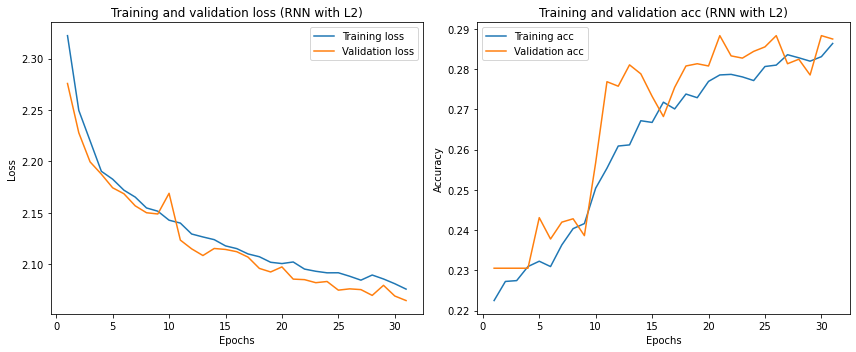

In [68]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_rnn_model_with_l2(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_length))
    model.add(SimpleRNN(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.001), dropout=0.1, recurrent_dropout=0.1))
    model.add(SimpleRNN(64, activation='relu', dropout=0.1, recurrent_dropout=0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

rnn_model_with_l2 = build_rnn_model_with_l2()


#Train
history_rnn_with_l2 = rnn_model_with_l2.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss_rnn_with_l2 = history_rnn_with_l2.history["loss"]
val_loss_rnn_with_l2 = history_rnn_with_l2.history["val_loss"]

epochs_rnn_with_l2 = range(1, len(loss_rnn_with_l2) + 1)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs_rnn_with_l2, loss_rnn_with_l2, label="Training loss")
axes[0].plot(epochs_rnn_with_l2, val_loss_rnn_with_l2, label="Validation loss")
axes[0].set_title("Training and validation loss (RNN with L2)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc_rnn_with_l2 = history_rnn_with_l2.history["accuracy"]
val_acc_rnn_with_l2 = history_rnn_with_l2.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs_rnn_with_l2, acc_rnn_with_l2, label="Training acc")
axes[1].plot(epochs_rnn_with_l2, val_acc_rnn_with_l2, label="Validation acc")
axes[1].set_title("Training and validation acc (RNN with L2)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout()
plt.show()


In [69]:
# Get predictions on the validation set
y_val_pred_prob_rnn = rnn_model_with_l2.predict(x_val)
y_val_pred_rnn = np.argmax(y_val_pred_prob_rnn, axis=-1)

# Calculate F1 score
f1 = f1_score(y_val, y_val_pred_rnn, average='weighted')
print(f'Weighted F1 Score: {f1}')

112/112 [==============================] - 1s 3ms/step
Weighted F1 Score: 0.214981266480821


We can see that compared to the previous model which all the layers were dense, this model with 2 RNN layers reaches the same amount of accuracy in fewer epochs and the validation loss also reaches a lower value in the end compared to the previous model. The F1 score is also computed above, which is 0.21. The range of the F1 score is between 0 to 1, in which 1 is the perfect precision and 0 is the worst. I mentioned at the beginning of this section that I am going to increase the number of `max_words` in the following procedure.

In [74]:
x_train = AugmentedSyn_df['Movies']
y_train = AugmentedSyn_df['Genre']


# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Tokenize the movie titles
max_words = 100 #increasing max_words
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", lower=False)
tokenizer.fit_on_texts(x_train)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Splitting data into training and validation
partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train_padded, y_train_encoded, test_size=0.2, random_state=20
)

#for the number of output layer neurons
num_classes = len(np.unique(y_train_encoded))

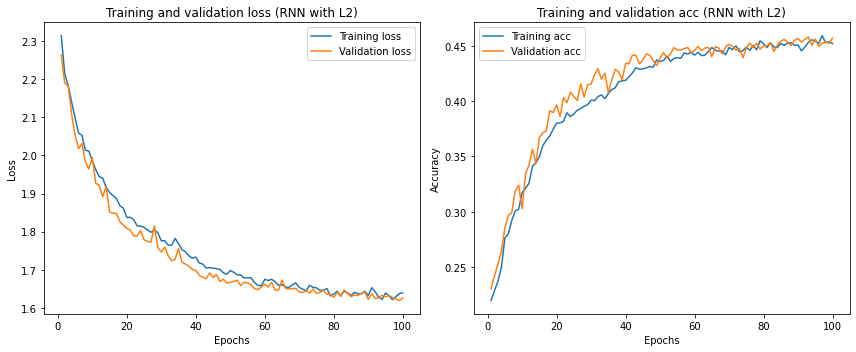

In [75]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_rnn_model_with_l2(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_length))
    model.add(SimpleRNN(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.001), dropout=0.1, recurrent_dropout=0.1))
    model.add(SimpleRNN(64, activation='relu', dropout=0.1, recurrent_dropout=0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

rnn_model_with_l2 = build_rnn_model_with_l2()


#Train
history_rnn_with_l2 = rnn_model_with_l2.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss_rnn_with_l2 = history_rnn_with_l2.history["loss"]
val_loss_rnn_with_l2 = history_rnn_with_l2.history["val_loss"]

epochs_rnn_with_l2 = range(1, len(loss_rnn_with_l2) + 1)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs_rnn_with_l2, loss_rnn_with_l2, label="Training loss")
axes[0].plot(epochs_rnn_with_l2, val_loss_rnn_with_l2, label="Validation loss")
axes[0].set_title("Training and validation loss (RNN with L2)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc_rnn_with_l2 = history_rnn_with_l2.history["accuracy"]
val_acc_rnn_with_l2 = history_rnn_with_l2.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs_rnn_with_l2, acc_rnn_with_l2, label="Training acc")
axes[1].plot(epochs_rnn_with_l2, val_acc_rnn_with_l2, label="Validation acc")
axes[1].set_title("Training and validation acc (RNN with L2)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout()
plt.show()


In [76]:
# Get predictions on the validation set
y_val_pred_prob_rnn = rnn_model_with_l2.predict(x_val)
y_val_pred_rnn = np.argmax(y_val_pred_prob_rnn, axis=-1)

# Calculate F1 score
f1 = f1_score(y_val, y_val_pred_rnn, average='weighted')
print(f'Weighted F1 Score: {f1}')

112/112 [==============================] - 1s 3ms/step
Weighted F1 Score: 0.425189045783496


By increasing `max_words` from 10 to 100, the accuracy reaches a higher amount both in the validation and training set. The loss is also decreased to a lower value compared to the former model. The F1 score is also increasing to 0.42. Our goal is to increase the F1 score besides the accuracy. The F1 score considers both precision and recall which provide us a better view of our model performance.

In [77]:
x_train = AugmentedSyn_df['Movies']
y_train = AugmentedSyn_df['Genre']


# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Tokenize the movie titles
max_words = 1000 #increasing max_words
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", lower=False)
tokenizer.fit_on_texts(x_train)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Splitting data into training and validation
partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train_padded, y_train_encoded, test_size=0.2, random_state=20
)

#for the number of output layer neurons
num_classes = len(np.unique(y_train_encoded))

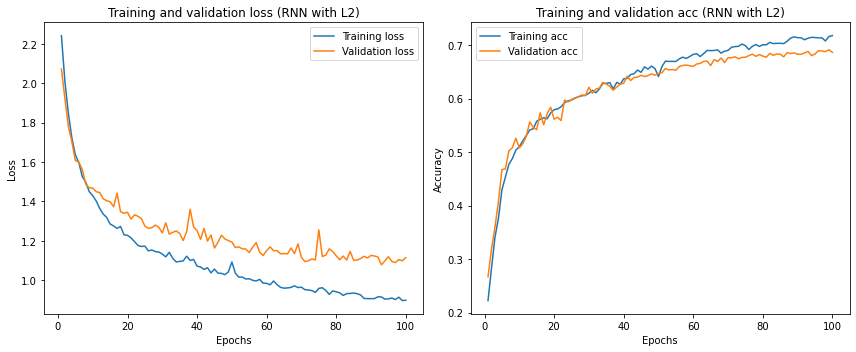

In [78]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_rnn_model_with_l2(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_length))
    model.add(SimpleRNN(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.001), dropout=0.1, recurrent_dropout=0.1))
    model.add(SimpleRNN(64, activation='relu', dropout=0.1, recurrent_dropout=0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

rnn_model_with_l2 = build_rnn_model_with_l2()


#Train
history_rnn_with_l2 = rnn_model_with_l2.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss_rnn_with_l2 = history_rnn_with_l2.history["loss"]
val_loss_rnn_with_l2 = history_rnn_with_l2.history["val_loss"]

epochs_rnn_with_l2 = range(1, len(loss_rnn_with_l2) + 1)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs_rnn_with_l2, loss_rnn_with_l2, label="Training loss")
axes[0].plot(epochs_rnn_with_l2, val_loss_rnn_with_l2, label="Validation loss")
axes[0].set_title("Training and validation loss (RNN with L2)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc_rnn_with_l2 = history_rnn_with_l2.history["accuracy"]
val_acc_rnn_with_l2 = history_rnn_with_l2.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs_rnn_with_l2, acc_rnn_with_l2, label="Training acc")
axes[1].plot(epochs_rnn_with_l2, val_acc_rnn_with_l2, label="Validation acc")
axes[1].set_title("Training and validation acc (RNN with L2)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout()
plt.show()


In [79]:
# Get predictions on the validation set
y_val_pred_prob_rnn = rnn_model_with_l2.predict(x_val)
y_val_pred_rnn = np.argmax(y_val_pred_prob_rnn, axis=-1)

# Calculate F1 score
f1 = f1_score(y_val, y_val_pred_rnn, average='weighted')
print(f'Weighted F1 Score: {f1}')

112/112 [==============================] - 0s 3ms/step
Weighted F1 Score: 0.6894940163859475


In the preceding cells, I increased the `max_words` again to 1000. The accuracy of our model increased to nearly 70%. The loss value also decreased but the difference between validation loss and our training loss at the end of the process became greater. I believe the F1 score also reached an acceptable amount even if it is not high enough.

## 6.2. Simple RNN Model with Shuffled Data
<a id="rnn-model-shuffled"></a>

In the next cell, I will shuffle my data before feeding it into the same RNN model to see if changing the order of titles will affect my model accuracy and check if the model is memorizing the sequence of my data for prediction.

In [80]:
x_train = AugmentedSyn_df['Movies']
y_train = AugmentedSyn_df['Genre']


# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Tokenize the movie titles
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", lower=False)
tokenizer.fit_on_texts(x_train)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Shuffle the data
indices = np.arange(x_train_padded.shape[0])
np.random.shuffle(indices)

x_train_padded = x_train_padded[indices]
y_train_encoded = y_train_encoded[indices]

# Split shuffled data into training and validation
partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train_padded, y_train_encoded, test_size=0.2, random_state=20
)

#for the number of output layer neurons
num_classes = len(np.unique(y_train_encoded))

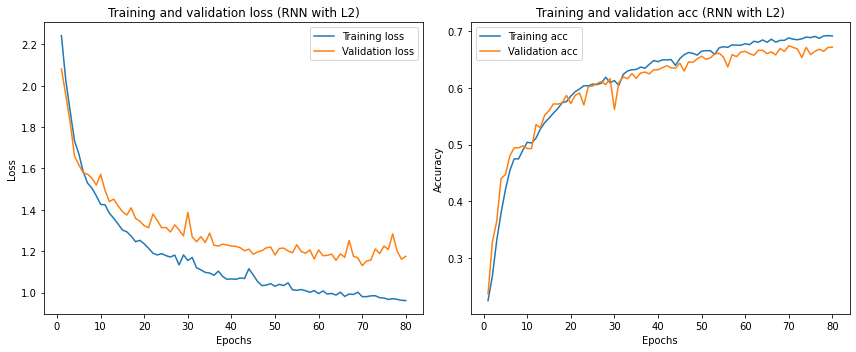

In [81]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_rnn_model_with_l2(clear=True):
    if clear:
        tf.keras.backend.clear_session()
            
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_length))
    model.add(SimpleRNN(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.001), dropout=0.1, recurrent_dropout=0.1))
    model.add(SimpleRNN(64, activation='relu', dropout=0.1, recurrent_dropout=0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

rnn_model_with_l2 = build_rnn_model_with_l2()


#Train
history_rnn_with_l2 = rnn_model_with_l2.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)

loss_rnn_with_l2 = history_rnn_with_l2.history["loss"]
val_loss_rnn_with_l2 = history_rnn_with_l2.history["val_loss"]

epochs_rnn_with_l2 = range(1, len(loss_rnn_with_l2) + 1)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs_rnn_with_l2, loss_rnn_with_l2, label="Training loss")
axes[0].plot(epochs_rnn_with_l2, val_loss_rnn_with_l2, label="Validation loss")
axes[0].set_title("Training and validation loss (RNN with L2)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc_rnn_with_l2 = history_rnn_with_l2.history["accuracy"]
val_acc_rnn_with_l2 = history_rnn_with_l2.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs_rnn_with_l2, acc_rnn_with_l2, label="Training acc")
axes[1].plot(epochs_rnn_with_l2, val_acc_rnn_with_l2, label="Validation acc")
axes[1].set_title("Training and validation acc (RNN with L2)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout()
plt.show()


It is clear that our validation accuracy still reached the same amount of accuracy even after shuffling the data. The validation loss also reached the same amount.

# 7. LSTM 
<a id="lstm"></a>

LSTM is "a class of RNN that has found practical applications is Long Short-Term Memory (LSTM) because it is robust against the problems of long-term dependency."<sup>[<a href="https://towardsdatascience.com/lstm-by-example-using-tensorflow-feb0c1968537">Link</a>]</sup> defined by Rowel Atienza.

I am going to check if this model performs better than a simple RNN.

## 7.1. LSTM Model
<a id="lstm-model"></a>

Our data is the same as the simple RNN model (synonym augmented data) and they are tokenized, padded and split like before. Instead of the simple RNN layers, LSTM will be replaced with the same amount of dropouts, regularizers and other features.

In [82]:
x_train = AugmentedSyn_df['Movies']
y_train = AugmentedSyn_df['Genre']


# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Tokenize the movie titles
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", lower=False)
tokenizer.fit_on_texts(x_train)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Shuffle your data
indices = np.arange(x_train_padded.shape[0])
np.random.shuffle(indices)

x_train_padded = x_train_padded[indices]
y_train_encoded = y_train_encoded[indices]

# Split shuffled data into training and validation
partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train_padded, y_train_encoded, test_size=0.2, random_state=20
)

#for the number of output layer neurons
num_classes = len(np.unique(y_train_encoded))

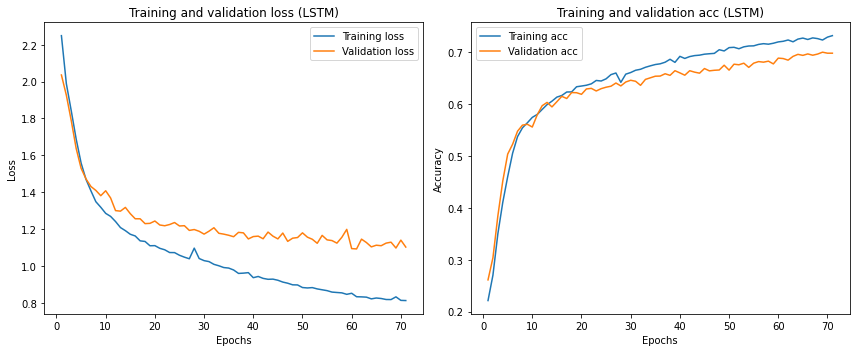

In [83]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_lstm_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_length))
    model.add(LSTM(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.001), dropout=0.1, recurrent_dropout=0.1))
    model.add(LSTM(64, activation='relu', dropout=0.1, recurrent_dropout=0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

lstm_model = build_lstm_model()


#Train
history_lstm = lstm_model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping_lstm],
    verbose=0
)


loss_lstm = history_lstm.history["loss"]
val_loss_lstm = history_lstm.history["val_loss"]

epochs_lstm = range(1, len(loss_lstm) + 1)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs_lstm, loss_lstm, label="Training loss")
axes[0].plot(epochs_lstm, val_loss_lstm, label="Validation loss")
axes[0].set_title("Training and validation loss (LSTM)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc_lstm = history_lstm.history["accuracy"]
val_acc_lstm = history_lstm.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs_lstm, acc_lstm, label="Training acc")
axes[1].plot(epochs_lstm, val_acc_lstm, label="Validation acc")
axes[1].set_title("Training and validation acc (LSTM)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout()
plt.show()


By comparing LSTM with simple RNN, we can find out that an LSTM is achieving better results in achieving lower loss and higher accuracy for the training set but for the validation set the results are approximately similar to the simple RNN.

# 8. Functional API
<a id="func-api"></a>
Based on the TensorFLow website "The Keras functional API is a way to create models that are more flexible than the Keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs."<sup>[<a href="https://keras.io/guides/functional_api/">Link</a>]</sup>. It is a proper choice when we are trying to feed our model with multiple inputs.

## 8.1. Functional API Model - Title & Distributor Input
<a id="func-api-model-title-dist"></a>

In our case, I will try to use other inputs rather than just the movie title (the distributor, year of presentation, etc) to see if it reaches better accuracy. In functional API we create each layer on top of the other. In the first attempt, I tried to make a functional API model based on 2 inputs:
- movie title
- distributor

Except for all the changes we used to make every time in our data such as tokenizing and padding, we have to encode the distributors too because it is part of our inputs now.

In [84]:
# Defining each input
movie_titles = Main_df['Movies'].values
genres = Main_df['Genre'].values
distributor = Main_df['distributor'].values
year = Main_df['Year'].values
gross = Main_df['total gross'].values

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(genres)

# Tokenize the movie titles
max_words = 10
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", lower=False)
tokenizer.fit_on_texts(movie_titles)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(movie_titles)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Split the data into training and validation sets
x_train, x_val, genres_train, genres_val, distributor_train, distributor_val, year_train, year_val, gross_train, gross_val, y_train, y_val = train_test_split(
    x_train_padded, genres, distributor, year, gross, y_train_encoded, test_size=0.2, random_state=20
)

#for the number of output layer neurons
num_unique_distributors = len(set(Main_df_augment['distributor']))

#distributor as a categorical variable
encoder = OneHotEncoder(sparse=False)
distributor_encoded_train = encoder.fit_transform(distributor_train.reshape(-1, 1))
distributor_encoded_val = encoder.transform(distributor_val.reshape(-1, 1))

# Use the same number of categories for both training and validation
num_categories = distributor_encoded_train.shape[1]

For making a Functional API model we first define the shape of our inputs (in this case title and distributor) and then apply embedding and flattening to each. In the end, these inputs integrate with each other as `merged` and are used as the input of our first layer. Below we can see what it really means by making each layer on top of each other, at the end of each layer, we can see what is the input of that layer. For example at the end of `dense2` we can see that `dense1` is going to be used as the input of that layer.

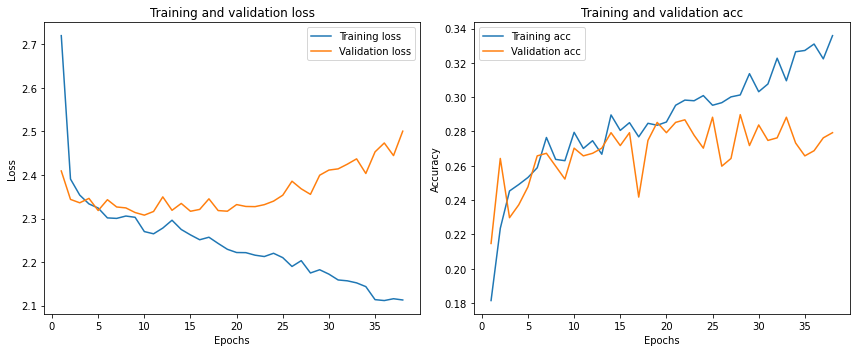

In [85]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()

    movie_input = tf.keras.layers.Input(shape=(max_length,), name='movie_input')
    distributor_input = tf.keras.layers.Input(shape=(num_categories,), name='distributor_input')  # Adjust num_categories


    movie_embedding = tf.keras.layers.Embedding(input_dim=max_words, output_dim=64)(movie_input)
    movie_flatten = tf.keras.layers.Flatten()(movie_embedding)

    distributor_embedding = tf.keras.layers.Embedding(input_dim=num_unique_distributors, output_dim=64)(distributor_input)
    distributor_flatten = tf.keras.layers.Flatten()(distributor_embedding)
    
    merged = tf.keras.layers.concatenate([movie_flatten, distributor_flatten ])

    dense1 = tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.002), activation='relu')(merged)
    dense2 = tf.keras.layers.Dense(128, activation='relu')(dense1)
    dropout1 = tf.keras.layers.Dropout(0.1)(dense2)
    dense3 = tf.keras.layers.Dense(64, activation='relu')(dropout1)
    output_layer = tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')(dense3)

    model = tf.keras.Model(inputs=[movie_input, distributor_input], outputs=output_layer)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

model = build_model()

#Train
history = model.fit(
    {'movie_input': x_train, 'distributor_input': distributor_encoded_train},
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=({'movie_input': x_val, 'distributor_input': distributor_encoded_val}, y_val),
    verbose=0,
        callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()

The accuracy of the model is less than LSTM and simple RNN and we can see signs of overfitting in the loss diagram since the validation loss is increasing. In the next cell, I will increase the value of the L2 regularizer and the dropout to solve this problem.

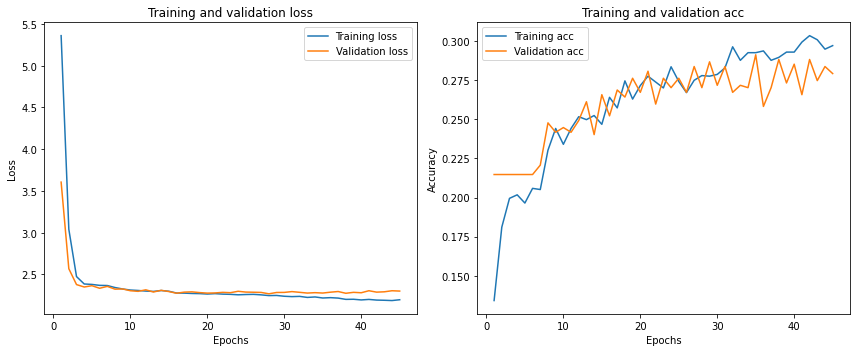

In [86]:
# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()

    movie_input = tf.keras.layers.Input(shape=(max_length,), name='movie_input')
    distributor_input = tf.keras.layers.Input(shape=(num_categories,), name='distributor_input')  # Adjust num_categories


    movie_embedding = tf.keras.layers.Embedding(input_dim=max_words, output_dim=64)(movie_input)
    movie_flatten = tf.keras.layers.Flatten()(movie_embedding)

    distributor_embedding = tf.keras.layers.Embedding(input_dim=num_unique_distributors, output_dim=64)(distributor_input)
    distributor_flatten = tf.keras.layers.Flatten()(distributor_embedding)
    
    merged = tf.keras.layers.concatenate([movie_flatten, distributor_flatten ])

    dense1 = tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu')(merged) #greater L2
    dense2 = tf.keras.layers.Dense(128, activation='relu')(dense1)
    dropout1 = tf.keras.layers.Dropout(0.4)(dense2) #the drop out increased
    dense3 = tf.keras.layers.Dense(64, activation='relu')(dropout1)
    output_layer = tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')(dense3)

    model = tf.keras.Model(inputs=[movie_input, distributor_input], outputs=output_layer)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


model = build_model()

#Train
history = model.fit(
    {'movie_input': x_train, 'distributor_input': distributor_encoded_train},
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=({'movie_input': x_val, 'distributor_input': distributor_encoded_val}, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()

After changing the L2 regularizer to 0.01 and dropout to 0.4 the validation loss does not increase any more. The loss is somehow constant after the first few epochs. In case we used the validation loss for the early stopping law, the training process would be stopped earlier. The training and validation accuracy is lower in comparison to the preceding model with distinct values of regularizer and dropout.

## 8.2. Functional API Model - All Input
<a id="func-api-model-all"></a>

In this model, I am going to use all the data that I have for each title as the input. It is predictable that small models like what we used until now with a high amount of data will either overfit or underfit instead of learning the relations. The procedure of preparing the data before passing it through the model is the same as before, the only difference is the expansion in the number of inputs from 2 to 5. I have to note that the data used here is our base data, not the augmented versions.

In [87]:
movie_titles = Main_df['Movies'].values
genres = Main_df['Genre'].values
distributor = Main_df['distributor'].values
year = Main_df['Year'].values
gross = Main_df['total gross'].values

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(genres)

# Tokenize the movie titles
max_words = 10
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", lower=False)
tokenizer.fit_on_texts(movie_titles)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(movie_titles)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Split the data into training and validation sets
x_train, x_val, genres_train, genres_val, distributor_train, distributor_val, year_train, year_val, gross_train, gross_val, y_train, y_val = train_test_split(
    x_train_padded, genres, distributor, year, gross, y_train_encoded, test_size=0.2, random_state=20
)

num_unique_distributors = len(set(Main_df_augment['distributor']))

# distributor is a categorical variable
encoder = OneHotEncoder(sparse=False)
distributor_encoded_train = encoder.fit_transform(distributor_train.reshape(-1, 1))
distributor_encoded_val = encoder.transform(distributor_val.reshape(-1, 1))

# Use the same number of categories for both training and validation
num_categories = distributor_encoded_train.shape[1]


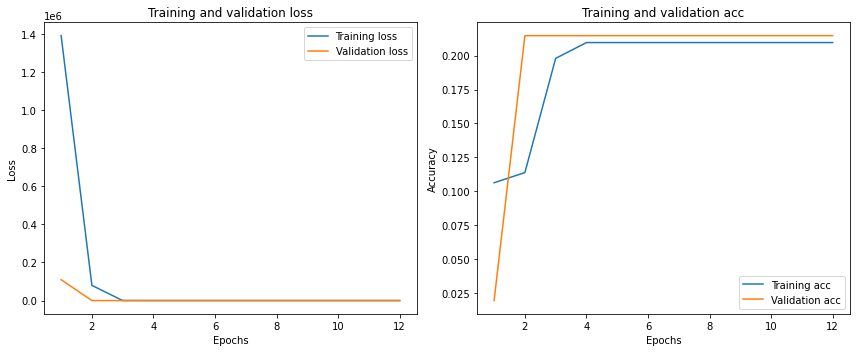

In [88]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()

    movie_input = tf.keras.layers.Input(shape=(max_length,), name='movie_input')
    distributor_input = tf.keras.layers.Input(shape=(num_categories,), name='distributor_input') 
    year_input = tf.keras.layers.Input(shape=(1,), name='year_input')
    gross_input = tf.keras.layers.Input(shape=(1,), name='gross_input')

    movie_embedding = tf.keras.layers.Embedding(input_dim=max_words, output_dim=64)(movie_input)
    movie_flatten = tf.keras.layers.Flatten()(movie_embedding)

    distributor_embedding = tf.keras.layers.Embedding(input_dim=num_unique_distributors, output_dim=64)(distributor_input)
    distributor_flatten = tf.keras.layers.Flatten()(distributor_embedding)
    
    merged = tf.keras.layers.concatenate([movie_flatten, distributor_flatten, year_input, gross_input])

    dense1 = tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.002), activation='relu')(merged)
    dense2 = tf.keras.layers.Dense(128, activation='relu')(dense1)
    dropout1 = tf.keras.layers.Dropout(0.1)(dense2)
    dense3 = tf.keras.layers.Dense(64, activation='relu')(dropout1)
    output_layer = tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')(dense3)

    model = tf.keras.Model(inputs=[movie_input, distributor_input, year_input, gross_input], outputs=output_layer)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


model = build_model()

#Train
history = model.fit(
    {'movie_input': x_train, 'distributor_input': distributor_encoded_train, 'year_input': year_train, 'gross_input': gross_train},
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=({'movie_input': x_val, 'distributor_input': distributor_encoded_val, 'year_input': year_val, 'gross_input': gross_val}, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)



loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# accuracy plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()

We can see that the the loss for both validation loss and training loss is fixed after 2 epochs and the accuracy is also fixed at a low rate after the first few epochs which means our model is not learning. In the next cell, I am going to replace 2 of my dense layers with LSTM as prior models with LSTM reached better accuracy. For using a LSTM layer in our model we have to reshape our merged input before feeding it through our model.

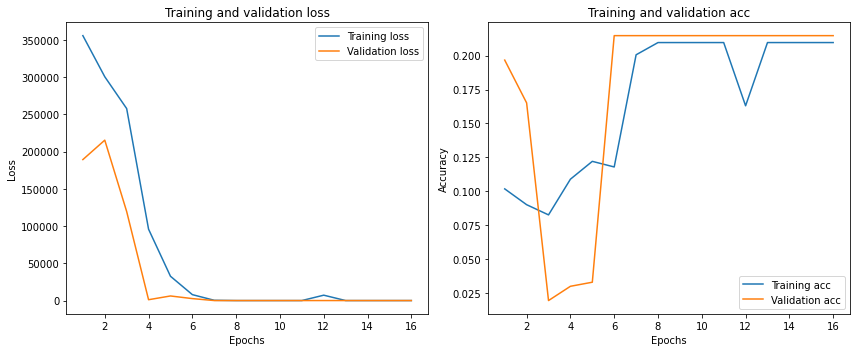

In [89]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()

    movie_input = tf.keras.layers.Input(shape=(max_length,), name='movie_input')
    distributor_input = tf.keras.layers.Input(shape=(num_categories,), name='distributor_input')  # Adjust num_categories
    year_input = tf.keras.layers.Input(shape=(1,), name='year_input')
    gross_input = tf.keras.layers.Input(shape=(1,), name='gross_input')

    movie_embedding = tf.keras.layers.Embedding(input_dim=max_words, output_dim=64)(movie_input)
    movie_flatten = tf.keras.layers.Flatten()(movie_embedding)

    distributor_embedding = tf.keras.layers.Embedding(input_dim=num_unique_distributors, output_dim=64)(distributor_input)
    distributor_flatten = tf.keras.layers.Flatten()(distributor_embedding)
    
    merged = tf.keras.layers.concatenate([movie_flatten, distributor_flatten, year_input, gross_input])
    # Add a Reshape layer to make the input 3D for the LSTM layer
    reshaped_merged = tf.keras.layers.Reshape((1, merged.shape[1]))(merged)
    
    dense1 = tf.keras.layers.LSTM(256, kernel_regularizer=tf.keras.regularizers.l2(0.002), activation='relu', return_sequences=True)(reshaped_merged)
    dense2 = tf.keras.layers.LSTM(128, activation='relu')(dense1)
    dropout1 = tf.keras.layers.Dropout(0.1)(dense2)
    dense3 = tf.keras.layers.Dense(64, activation='relu')(dropout1)
    output_layer = tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')(dense3)

    model = tf.keras.Model(inputs=[movie_input, distributor_input, year_input, gross_input], outputs=output_layer)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


model = build_model()

#Train
history = model.fit(
    {'movie_input': x_train, 'distributor_input': distributor_encoded_train, 'year_input': year_train, 'gross_input': gross_train},
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=({'movie_input': x_val, 'distributor_input': distributor_encoded_val, 'year_input': year_val, 'gross_input': gross_val}, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()

The loss starts from a very high rate and becomes still to 0 which is not a good sign. On the other hand, our validation accuracy is also constant after epoch 6 without any change.

## 8.3. Functional API Model with a Sentiment Score
<a id="func-api-sentiment"></a>

Sentiment score is one of the elements that have been used for classifying movie reviews as good and bad. One of the most famous datasets for using sentiment analysis is the IMDb reviews dataset (The IMDb Movie Reviews dataset is a binary sentiment analysis dataset consisting of 50,000 reviews from the Internet Movie Database (IMDb) labelled as positive or negative. The dataset contains an even number of positive and negative reviews.)<sup>[<a href="https://paperswithcode.com/dataset/imdb-movie-reviews">Link</a>]</sup>

As the sentiment score might also related to the genre movie, we will add it to our data frame to see if a specific range of sentiment score represent a specific genre.

### 8.3.1. Adding Sentiment Score
<a id="sentiment-add"></a>

The compound score of each movie title will be added using the NLTK library to our data frame as a new column regardless of the stopwords in each title.

The NLTK is defined on their website as: "NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum."<sup>[<a href="https://www.nltk.org/">Link</a>]</sup>

In [90]:
analyzer = SentimentIntensityAnalyzer()

# Download NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

movie_titles = Main_df['Movies']
genres = Main_df['Genre']

sia = SentimentIntensityAnalyzer()

# get the compound sentiment score
def get_compound_sentiment(title):
    # Tokenize the title
    words = word_tokenize(title)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    
    # Calculate sentiment scores
    sentiment_score = sia.polarity_scores(' '.join(words))
    
    return sentiment_score['compound']

# Apply sentiment analysis to each movie title
compound_sentiments = movie_titles.apply(get_compound_sentiment)

# new data frame with movie titles, genres, and compound sentiment scores
Sentiment_df = pd.DataFrame({
    'Movies': Main_df['Movies'],
    'Genre': genres,
    'Sentiment': compound_sentiments,
    'Distributor' : Main_df['distributor'],
    'Total gross' : Main_df['total gross'],
    'Year' : Main_df['Year']
})

display(Sentiment_df.head(10))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/students/arazz002/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/students/arazz002/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/students/arazz002/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Movies,Genre,Sentiment,Distributor,Total gross,Year
0,How the Grinch Stole Christmas,Family,0.0000,Universal Pictures,465480236.8,2000
1,Mission: Impossible II,Adventure,0.0000,Paramount Pictures,385583701.3,2000
2,Gladiator,Action,0.0000,DreamWorks Distribution,335992714.3,2000
3,The Perfect Storm,Action,0.5719,Warner Bros.,326886996.9,2000
4,Meet the Parents,Comedy,0.0000,Universal Pictures,297576840.6,2000
5,Scary Movie,Comedy,-0.4939,Miramax,281065390.1,2000
6,What Lies Beneath,Drama,-0.4215,DreamWorks Distribution,278281188.3,2000
7,Dinosaur,Family,0.0000,Walt Disney Studios Motion Pictures,246569032.8,2000
8,Erin Brockovich,Drama,0.0000,Universal Pictures,224815417.0,2000
9,Nutty Professor II: The Klumps,Fantasy,0.0000,Universal Pictures,220724703.1,2000


Here we can see some of the movies with their sentiment score. By observing the table separately we will notice that most of the scores are zero, meaning that most of the titles are neutral. I could not find any specific relation between the sentiment score and the genre. I looked for a range of scores in which a specific genre occurred. For example, Dragon Ball Super: Superhero has a score of 0.9081 while Kung Fu Panda is -0.6908. Additionally, I did not find any relationship between the titles' neighbour for example Kill Bill Vol2 and Kung Fu Panda has the same sentiment score number. with all these, I am going to make a functional API model with a sentiment score to see if it helps or not.

In [94]:
Sentiment_df.to_csv('Sentiment_df.csv')

In [91]:
Sentiment_df = pd.read_csv('Sentiment_df.csv')

### 8.3.2. Functional API Sentiment Model
<a id="sentiment-model"></a>

In the following functional API model, I am going to use sentiment score and movie title as the input and see the results. The preprocessing of the data is the same as before and we do not need any changes in the sentiment score as they are all floats with the same precision.

In [92]:
movie_titles = Sentiment_df['Movies'].values
sentiments = Sentiment_df['Sentiment'].values
genres = Sentiment_df['Genre'].values
distributor = Sentiment_df['Distributor'].values
year = Sentiment_df['Year'].values
gross = Sentiment_df['Total gross'].values

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(genres)

# Tokenize the movie titles
max_words = 10
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", lower=False)
tokenizer.fit_on_texts(movie_titles)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(movie_titles)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Split the data into training and validation sets
x_train, x_val, sentiment_train, sentiment_val, genres_train, genres_val, distributor_train, distributor_val, year_train, year_val, gross_train, gross_val, y_train, y_val = train_test_split(
    x_train_padded, sentiments, genres, distributor, year, gross, y_train_encoded, test_size=0.2, random_state=20
)


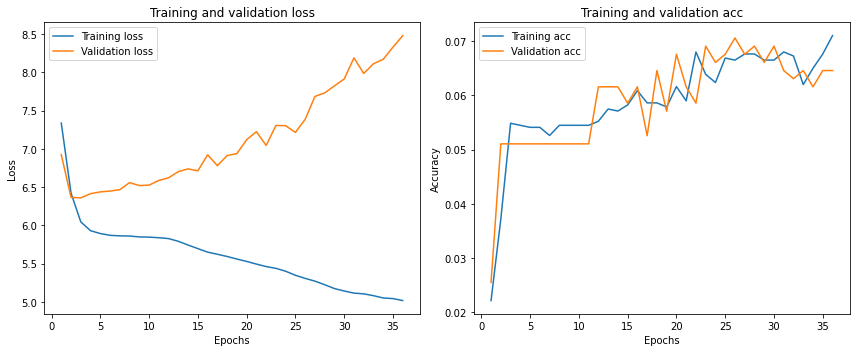

In [93]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()

    movie_input = tf.keras.layers.Input(shape=(max_length,), name='movie_input')
    sentiment_input = tf.keras.layers.Input(shape=(1,), name='sentiment_input')


    movie_embedding = tf.keras.layers.Embedding(input_dim=max_words, output_dim=64)(movie_input)
    movie_flatten = tf.keras.layers.Flatten()(movie_embedding)


    merged = tf.keras.layers.concatenate([movie_flatten, sentiment_input ])

    dense1 = tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.002), activation='relu')(merged)
    dense2 = tf.keras.layers.Dense(128, activation='relu')(dense1)
    dropout1 = tf.keras.layers.Dropout(0.1)(dense2)
    dense3 = tf.keras.layers.Dense(64, activation='relu')(dropout1)
    output_layer = tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')(dense3)

    model = tf.keras.Model(inputs=[movie_input, sentiment_input], outputs=output_layer)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


model = build_model()

#Train
history = model.fit(
    {'movie_input': x_train, 'sentiment_input': sentiment_train},
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=({'movie_input': x_val, 'sentiment_input': sentiment_val}, y_val),
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )]
)


loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# loss plot
axes[0].plot(epochs, loss, label="Training loss")
axes[0].plot(epochs, val_loss, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# accuracy plot
axes[1].plot(epochs, acc, label="Training acc")
axes[1].plot(epochs, val_acc, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()

By comparing the effect of adding sentiment score to the movie titles and another 2 inputs approach such as the previous method which was adding the distributor name to the movie title, we can conclude that adding the distributor name can help achieve better accuracy. The accuracy of this model is low and the validation loss is also increasing after a few epochs which means overfitting. Our model can not find a relation between the title and sentiment score with the genre.

# 9. Testing the Best Model
<a id="best-model"></a>

We have tried lots of models and now we want to test the best performance in our unseen data and predict the genre for that title. Our test data is stored in another data frame and the genre was named "Unknown", first, we will change them with numpy `NaN` to make them without any value ("Unknown" is defined as without a genre for us, but for the model it is a value), and eventually use our best model (which is LSTM) on it.

## 9.1. Testing the Best Model on our Data
<a id="best-model-ourdata"></a>

Below we can see what our unseen data looks like.

In [94]:
unknown_genre_df['Genre'] = np.nan

display(unknown_genre_df.head(10))

,Unnamed: 0,Movies,theater sale,total gross,distributor,Year,Genre
0,5,X-Men,5570.48,2.815665e+08,Twentieth Century Fox,2000,NaN
1,17,Gone in 60 Seconds,5529.31,1.819509e+08,Walt Disney Studios Motion Pictures,2000,NaN
2,29,Rugrats in Paris,5257.23,1.369489e+08,Paramount Pictures,2000,NaN
3,32,Rules of Engagement,5763.8,1.097901e+08,Paramount Pictures,2000,NaN
4,44,The Cider House Rules,3111.02,1.030057e+08,Miramax,2000,NaN
5,56,Pokémon the Movie 2000,4926.08,7.832804e+07,Warner Bros.,2000,NaN
6,60,The Exorcist2000 Director's Cut,3057.32,7.101111e+07,Warner Bros.,2000,NaN
7,65,The Original Kings of Comedy,1936.78,6.834719e+07,Paramount Pictures,2000,NaN
8,69,Keeping the Faith,3886.09,6.631571e+07,Walt Disney Studios Motion Pictures,2000,NaN
9,70,Bounce,3630.12,6.588147e+07,Miramax,2000,NaN


In the next cell, I will redefine our LSTM model and use the synonym augmented data.

In [95]:
x_train = AugmentedSyn_df['Movies']
y_train = AugmentedSyn_df['Genre']


# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Tokenize the movie titles
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", lower=False)
tokenizer.fit_on_texts(x_train)

# Convert movie titles to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in x_train_seq)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Shuffle the data
indices = np.arange(x_train_padded.shape[0])
np.random.shuffle(indices)

x_train_padded = x_train_padded[indices]
y_train_encoded = y_train_encoded[indices]

# Split shuffled data into training and validation
partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train_padded, y_train_encoded, test_size=0.2, random_state=20
)

num_classes = len(np.unique(y_train_encoded))

In [96]:
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# building model
def build_lstm_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_length))
    model.add(LSTM(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.001), dropout=0.1, recurrent_dropout=0.1))
    model.add(LSTM(64, activation='relu', dropout=0.1, recurrent_dropout=0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

lstm_model = build_lstm_model()

#defining early stopping
early_stopping_lstm = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10,
    restore_best_weights=True
)

#Train
history_lstm = lstm_model.fit(
    partial_x_train,
    partial_y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping_lstm],
    verbose=1
)


Epoch 1/100
112/112 [==============================] - 7s 25ms/step - loss: 2.2495 - accuracy: 0.2238 - val_loss: 2.0384 - val_accuracy: 0.2607
Epoch 2/100
112/112 [==============================] - 2s 21ms/step - loss: 2.0002 - accuracy: 0.2721 - val_loss: 1.9421 - val_accuracy: 0.2905
Epoch 3/100
112/112 [==============================] - 2s 21ms/step - loss: 1.8783 - accuracy: 0.3324 - val_loss: 1.8215 - val_accuracy: 0.3726
Epoch 4/100
112/112 [==============================] - 2s 21ms/step - loss: 1.7046 - accuracy: 0.3941 - val_loss: 1.6251 - val_accuracy: 0.4546
Epoch 5/100
112/112 [==============================] - 2s 21ms/step - loss: 1.5768 - accuracy: 0.4616 - val_loss: 1.5150 - val_accuracy: 0.5038
Epoch 6/100
112/112 [==============================] - 2s 21ms/step - loss: 1.4480 - accuracy: 0.5187 - val_loss: 1.4499 - val_accuracy: 0.5225
Epoch 7/100
112/112 [==============================] - 2s 22ms/step - loss: 1.3783 - accuracy: 0.5408 - val_loss: 1.4407 - val_accuracy:

A summary of our model and what our model looks like is provided below. We can see the output shape of our data after passing through each layer.

In [97]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 64)            64000     
                                                                 
 lstm (LSTM)                 (None, 13, 128)           98816     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 14)                910       
                                                                 
Total params: 217294 (848.80 KB)
Trainable params: 217294 (848.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Tokenizing the titles of our test set same as our training set:

In [98]:
x_unknown = unknown_genre_df['Movies']

# Tokenize the movie titles using the same tokenizer used for training
x_unknown_seq = tokenizer.texts_to_sequences(x_unknown)

# Pad sequences to have the same length as the training data
x_unknown_padded = pad_sequences(x_unknown_seq, maxlen=max_length, padding='post')

In [99]:
predictions = lstm_model.predict(x_unknown_padded)

# Convert the predicted probabilities to class labels
predicted_labels = [label_encoder.classes_[np.argmax(pred)] for pred in predictions]

# replace the predicted labels in the 'Genre' column
unknown_genre_df['Genre'] = predicted_labels


53/53 [==============================] - 0s 3ms/step


In [113]:
unknown_genre_df.to_csv('predicted.csv', index=False, encoding='utf-8')

In [100]:
predicted_df = pd.read_csv('predicted.csv')
display(predicted_df)

,Unnamed: 0,Movies,theater sale,total gross,distributor,Year,Genre
0,5,X-Men,5570.48,281566495.2,Twentieth Century Fox,2000,Drama
1,17,Gone in 60 Seconds,5529.31,181950942.1,Walt Disney Studios Motion Pictures,2000,Drama
2,29,Rugrats in Paris,5257.23,136948883.2,Paramount Pictures,2000,Drama
3,32,Rules of Engagement,5763.8,109790061.7,Paramount Pictures,2000,Drama
4,44,The Cider House Rules,3111.02,103005714.7,Miramax,2000,Action
...,...,...,...,...,...,...,...
1667,4992,The Thorn,834,577004.0,Others,2023,Drama
1668,4993,The Domino Revival,1020,572772.0,Others,2023,Drama
1669,4994,The Way2023 Re-release,755,567448.0,Others,2023,Drama
1670,4995,Of an Age,289,556585.0,Focus Features,2023,Animation


By looking at the 10 samples of the data we can understand that our model tends to predict Drama more. In the above samples, the model prediction is 30% (if we check it manually in the IMDB). For example, we can see that the X-men series was classified as an action movie 2 times in our data, 1 as Drama and 1 as Comedy which is 50% correct. the interesting prediction among the above chart is 'When Evil Lurks' which is a Horror movie indeed and Horror share in our data was 7.8%. As our data is not supervised here, we cannot measure our model accuracy. Therefore, another data will be used for evaluating our model in the next section.

## 9.2. Testing the Best Model on another Data
<a id="best-model-otherdata"></a>

We are going to use unseen data by HARSHIT SHANKHDHAR imported from [Kaggle](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows) to see how our model evaluate on it. The new data set has so many columns, that we are going to only keep `Series_Title`, `Released_Year` and `Genre` and then single label the genre column like before. I performed all the changes in the downloaded data frame without making a copy of it as it is just for testing. I kept the movies that were released before 2000 to avoid any overlap because my data set is from 2000 to 2023

In [101]:
unseen_df = pd.read_csv('imdb_top_1000.csv')

In [102]:
#only keep these 3 columns
selected_columns = ['Series_Title', 'Released_Year', 'Genre']
unseen_df = unseen_df[selected_columns]

In [103]:
unseen_df['Genre'] = unseen_df['Genre'].str.split(',').str[0].copy()

In [105]:
unseen_df.loc[:, 'Released_Year'] = pd.to_numeric(unseen_df['Released_Year'], errors='coerce')

# Filter movies released before 2000
unseen_df = unseen_df[unseen_df['Released_Year'] < 2000]

display(unseen_df.head(5))

,Series_Title,Released_Year,Genre
0,The Shawshank Redemption,1994.0,Drama
1,The Godfather,1972.0,Crime
3,The Godfather: Part II,1974.0,Crime
4,12 Angry Men,1957.0,Crime
6,Pulp Fiction,1994.0,Crime


There are some genres in this new data set that are not defined for our model, I am gonna delete the rows that contain unseen genres.

In [106]:
#find different genres between our model and this data
unseen_labels = set(unseen_df['Genre']) - set(label_encoder.classes_)
print("Unseen Labels:", unseen_labels)


Unseen Labels: {'Western', 'Film-Noir', 'Biography'}


In [107]:
# List of unseen labels
unseen_labels = {'Biography', 'Film-Noir', 'Western'}

# Filter rows that do not have unseen labels
filtered_df = unseen_df[~unseen_df['Genre'].isin(unseen_labels)]

display(filtered_df.head(5))


,Series_Title,Released_Year,Genre
0,The Shawshank Redemption,1994.0,Drama
1,The Godfather,1972.0,Crime
3,The Godfather: Part II,1974.0,Crime
4,12 Angry Men,1957.0,Crime
6,Pulp Fiction,1994.0,Crime


Defining our unseen movie title using tokenizer and padding for the evaluation:

In [108]:
x_test = filtered_df['Series_Title']

# Tokenize and pad the sequences
x_test_seq = tokenizer.texts_to_sequences(x_test)
x_test_padded = pad_sequences(x_test_seq, maxlen=max_length, padding='post')

# Encode the labels
y_test = label_encoder.transform(filtered_df['Genre'])

# Evaluate the model on the test set
evaluation_result = lstm_model.evaluate(x_test_padded, y_test)

print(f"Test Loss: {evaluation_result[0]}, Test Accuracy: {evaluation_result[1]}")

15/15 [==============================] - 0s 4ms/step - loss: 2.7436 - accuracy: 0.2830
Test Loss: 2.743591785430908, Test Accuracy: 0.28297871351242065


Our accuracy for this data is 28%. This amount is near to what we predict manually in our data.

# 10. Conclusion
<a id="conclusion"></a>

In this project, I have tried to mainly create a model which can predict the genre of movies from their title. We have tried to simplify our data by changing the data from a multilabel (different genres for one movie title) into a single label (one genre for each movie title), also some techniques for increasing our data set without importing more data have been used. We have tried some models that have been used for movie classification before in our dataset such as sequentials, RNN etc.

In the end, the model with the best accuracy is used for predicting the unseen data. It is well known that it is hard for models to predict with small information, as there are lots of good models that can predict with scripts and descriptions of a movie but prediction only with the title which normally won't exceed more than 5 words and many of them do not have any specific meaning is hard. I believe we can use this model as a baseline for predicting the main genre out of movie titles and re-train the model with bigger input data can help our model to predict better. The model might tend to classify unseen data as the most common genre (in our case Drama). The best model's accuracy was near 30% which is fairly good for predicting only by the title. I aimed to explore some models that have been used for classifying movies from other data before, but my results did not achieve as high as other research. I do not think achieving a very high accuracy from just the title would be possible for any model.

It would be better to have big data distributed equally for our training. In my case, if I wanted to make my data set equally distributed the number of samples would become very small to train. Unfortunately, I did not find a data set that concludes the genres of my unseen data to see how our model evaluates it. In further studies, it is worth using Functional API models or any other models to predict multiple outputs such as predicting genre and distributor from the title. Predicting the distributor from the genre and title of the movie would also be an interesting project. It might also be possible in the future to make a network similar to Reber Grammar to help the network identify the sequence of words in a movie title.

# 11. References
<a id="references"></a>

- Amazon. (accessed 30 Nov 2023). The difference between artificial intelligence and machine learning. <sup>[<a href="https://aws.amazon.com/compare/the-difference-between-artificial-intelligence-and-machine-learning/#:~:text=The%20goal%20of%20any%20AI,analyze%20large%20volumes%20of%20data.">Link</a>]</sup>

- Behrouzi, Tina, Ramin Toosi, and Mohammad Ali Akhaee, ‘Multimodal Movie Genre Classification Using Recurrent Neural Network’, Multimedia Tools and Applications, 82.4 (2023), 5763–84

- Cai, Zihui, Hongwei Ding, Jinlu Wu, Ying Xi, Xuemeng Wu, and Xiaohui Cui, ‘Multi-Label Movie Genre Classification Based on Multimodal Fusion’, Multimedia Tools and Applications, 2023

- Chollet, Francois. 2017. Deep Learning with Python. New York, NY: Manning Publications.

- Chengzhi Zhao, Chengzhi Zhao website. (accessed 30 Nov 2023). 4 faster pandas alternatives for data analysis.<sup>[<a href="https://chengzhizhao.com/4-faster-pandas-alternatives-for-data-analysis/#:~:text=Why%20is%20Pandas%20slow%20on,with%20multiple%20cores%20on%20parallelism">Link</a>]</sup>

- Deepanshi, Analytics Vidhya. (accessed 3 Dec 2023). Easy hyperparameter tuning in neural networks using Keras Tuner.<sup>[<a href="https://www.analyticsvidhya.com/blog/2021/08/easy-hyperparameter-tuning-in-neural-networks-using-keras-tuner/">Link</a>]</sup>

- Hwang, Tae-Gyu, Chan-Soo Park, Jeong-Hwa Hong, and Sung Kwon Kim, ‘An Algorithm for Movie Classification and Recommendation Using Genre Correlation’, Multimedia Tools and Applications, 75.20 (2016), 12843–58

- IMDb website. (accessed 30 Nov 2023). Genres. <sup>[<a href="https://help.imdb.com/article/contribution/titles/genres/GZDRMS6R742JRGAG#">Link</a>]</sup>

- Jason Brownlee, Machine learning mastery (accessed 5 Dec 2023).<sup>[<a href="https://machinelearningmastery.com/">Link</a>]</sup>

- Jeremie Wenger. AI classes and notebooks.

- Kaggle. (accessed 30 Nov 2023). IMDb movies dataset(Explore 10000+ movies worldwide with the IMDB Movies dataset). <sup>[<a href="https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset">Link</a>]</sup>

- Kaggle. (accessed 12 Oct 2023). IMDb movies dataset(Top 1000 Movies by IMDB Rating). <sup>[<a href="https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows">Link</a>]</sup>

- Kurtis Pykes, Neptune.ai website. (accessed 5 Dec 2023). Fighting overfitting with L1 or L2 regularization.<sup>[<a href="https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization#:~:text=L2%20regularization%2C%20or%20the%20L2,not%20making%20them%20exactly%200.">Link</a>]</sup>

- Kumar, Sanjay, Nikhil Kumar, Aditya Dev, and Siraz Naorem, ‘Movie Genre Classification Using Binary Relevance, Label Powerset, and Machine Learning Classifiers’, Multimedia Tools and Applications, 82.1 (2023), 945–68

- Mangolin, Rafael B, Rodolfo M Pereira, Alceu S Britto, Carlos N Silla, Valéria D Feltrim, Diego Bertolini, and others, ‘A Multimodal Approach for Multi-Label Movie Genre Classification’, arXiv.org, 2020

- NLTK documents. (accessed 10 Dec 2023).<sup>[<a href="https://www.nltk.org/">Link</a>]</sup>

- Papers with Code. (accessed 3 Dec 2023). IMDb movie reviews dataset.<sup>[<a href="https://paperswithcode.com/dataset/imdb-movie-reviews">Link</a>]</sup>

- Rajput, Nikhil Kumar, and Bhavya Ahuja Grover, ‘A Multi-Label Movie Genre Classification Scheme Based on the Movie’s Subtitles’, Multimedia Tools and Applications, 81.22 (2022), 32469–90

- Rowel Atienza, Towards Data Science. (accessed 6 Dec 2023). LSTM by example using TensorFlow. <sup>[<a href="https://towardsdatascience.com/lstm-by-example-using-tensorflow-feb0c1968537">Link</a>]</sup>

- Sachin Dev, medium website. (accessed 30 Nov 2023). Overfitting vs. underfitting. <sup>[<a href="https://medium.com/mlearning-ai/overfitting-vs-underfitting-6a41b3c6a9ad#:~:text=Overfitting%20is%20often%20caused%20by,enough%20for%20the%20given%20dataset.">Link</a>]</sup>

- Scikit-Learn documents. (accessed 6 Dec 2023).<sup>[<a href="https://scikit-learn.org/stable/index.html">Link</a>]</sup>

- TensorFlow documents. (accessed 7 Dec 2023).<sup>[<a href="https://www.tensorflow.org/">Link</a>]</sup>

- Wikipedia. (accessed 25 Nov 2023). List of colors: A–F. <sup>[<a href="https://en.wikipedia.org/wiki/List_of_colors:_A%E2%80%93F">Link</a>]</sup>

- Zhang, Zhongping, Yiwen Gu, Bryan A Plummer, Xin Miao, Jiayi Liu, and Huayan Wang, ‘Movie Genre Classification by Language Augmentation and Shot Sampling’, arXiv.org, 2023


In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
